# Load the data

# Creating a list of the "CSSEGISandData/COVID-19" csv file lines

In [127]:
import requests as req
import time
DATE = time.strftime("%m-%d-%H_")

# Create an empty list
ALLdata=[]

URL ="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv"

resp = req.get(URL)
content = resp.text

#clean the content, then break the content into lines 
content=content.replace(",,",",Ex,")
content=content.replace("(","")
content=content.replace(")","")
content=content.replace("\"","")
lines= content.splitlines()
print (len(lines))
# loop the lines one line at a time
# split each line at the delimiter ` , ` 
# then append the empty list 'ALLdata' with the line (which is now a list):  [line]  
for line in lines:
    #convert the splitlines to strings
    line= str(line).split(",")
    ALLdata.append(line)

3262


## finding counties with a "threshhold" increase in deaths
Take the last four consecutive entries of data to see if the number of deaths has increased for the last three days:<br />
To make it easy to understand lets use dates instead of data.<br /> 
May10 May11 May12 May13<br />
subract May10 from May11 check if the result is above the 'Threshhold'<br />
subract May11 from May12 check if the result is above the 'Threshhold'<br />
subract May12 from May13 check if the result is above the 'Threshhold'<br />
if all three conditions are met, print the location and information.

In [128]:
Threshhold = 1
count = 0
cnt=0
# Check each line of data, county by county.
for i in range(1,len(ALLdata)):
    # Increase a counter for every line -  this will allow further investigation into the data
    # as demonstarted in the next four cells.
    count=count+1
    # subtract the last four days of data to see if it has increased by the minimum of the Threshhold each day

    if int(ALLdata[i][-3])-int(ALLdata[i][-4]) >Threshhold and int(ALLdata[i][-2])-int(ALLdata[i][-3]) >Threshhold and int(ALLdata[i][-1])-int(ALLdata[i][-2]) >Threshhold:
        cnt=cnt+1
        # if they do increase as specified, define the line as a variable called history
        history=[int(ALLdata[i][-3])-int(ALLdata[i][-4]),int(ALLdata[i][-2])-int(ALLdata[i][-3]),int(ALLdata[i][-1])-int(ALLdata[i][-2])]
        # The total amount of deaths in the specific county
        deaths = int(ALLdata[i][-1])
        # The county's name
        county = ALLdata[i][5]
        # The State the county is located in
        state = ALLdata[i][6]
        # The longitude and latitude of the county
        longitude = ALLdata[i][9]
        Latitude = ALLdata[i][8]
        #print the data line by line
        print (cnt,"i="+str(count),deaths,county,state,longitude,Latitude,history)

1 i=210 1840 Los Angeles California -118.22824109999999 34.30828379 [40, 28, 19]
2 i=266 272 Denver Colorado -104.87256950000001 39.76018276 [13, 4, 7]
3 i=280 128 Jefferson Colorado -105.2517692 39.58635604 [4, 4, 2]
4 i=314 1153 Fairfield Connecticut -73.3881171 41.26809896 [16, 21, 7]
5 i=315 1084 Hartford Connecticut -72.73103891 41.80283011 [19, 25, 15]
6 i=318 830 New Haven Connecticut -72.93620426 41.408032500000004 [17, 17, 13]
7 i=323 130 New Castle Delaware -75.64054974 39.57992638 [7, 3, 6]
8 i=325 392 District of Columbia District of Columbia -77.01655992 38.90417773 [7, 8, 9]
9 i=353 55 Hillsborough Florida -82.32013172 27.9276559 [4, 2, 2]
10 i=368 566 Miami-Dade Florida -80.55170587 25.6112362 [11, 2, 5]
11 i=616 2889 Cook Illinois -87.81658794 41.84144849 [52, 25, 50]
12 i=622 300 DuPage Illinois -88.08642662 41.85116968 [6, 5, 2]
13 i=751 480 Marion Indiana -86.13826325 39.78163624 [9, 3, 3]
14 i=1135 216 East Baton Rouge Louisiana -91.09777565 30.53842039 [3, 4, 4]
15

In [131]:
# Using the info above
i=210
history=[int(ALLdata[i][-3])-int(ALLdata[i][-4]),int(ALLdata[i][-2])-int(ALLdata[i][-3]),int(ALLdata[i][-1])-int(ALLdata[i][-2])]
print (history)
print("----")
print (ALLdata[i])

[40, 28, 19]
----
['84006037', 'US', 'USA', '840', '6037.0', 'Los Angeles', 'California', 'US', '34.30828379', '-118.22824109999999', 'Los Angeles', ' California', ' US', '10039107', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '2', '2', '2', '5', '7', '11', '13', '21', '26', '26', '32', '44', '54', '64', '78', '89', '93', '132', '147', '169', '198', '223', '242', '244', '269', '322', '360', '405', '457', '497', '576', '600', '619', '663', '732', '797', '850', '895', '916', '944', '1002', '1056', '1111', '1174', '1209', '1231', '1257', '1315', '1369', '1418', '1470', '1515', '1531', '1570', '1616', '1660', '1711', '1753', '1793', '1821', '1840']


In [132]:
i=616
print (ALLdata[i])

['84017031', 'US', 'USA', '840', '17031.0', 'Cook', 'Illinois', 'US', '41.84144849', '-87.81658794', 'Cook', ' Illinois', ' US', '5150233', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '2', '2', '3', '4', '9', '9', '14', '18', '20', '28', '40', '44', '61', '95', '107', '141', '167', '186', '209', '249', '310', '352', '399', '455', '485', '543', '577', '630', '722', '760', '860', '877', '915', '1002', '1072', '1142', '1220', '1267', '1313', '1347', '1457', '1516', '1607', '1673', '1743', '1786', '1802', '1922', '2004', '2110', '2197', '2264', '2317', '2361', '2449', '2589', '2675', '2762', '2814', '2839', '2889']


In [133]:
i=1885
print (ALLdata[i][5],ALLdata[i][6])
print ("----")
# 8 and 9 are intentionally reversed so loingitude is first
print (ALLdata[i][9],ALLdata[i][8])
print ("\n-- Notice 'deaths' is a list of strings --")
numbers = ALLdata[i][14:]
print (numbers)
print ("\n-- 'deaths' Converted to integers --")
ListOfIntegers = [int(r) for r in numbers]
print (ListOfIntegers)

Suffolk New York
----
-72.8012172 40.88320119

-- Notice 'deaths' is a list of strings --
['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '2', '3', '3', '3', '7', '9', '9', '13', '17', '20', '22', '30', '30', '40', '40', '44', '53', '69', '84', '124', '175', '199', '263', '323', '362', '414', '458', '518', '568', '608', '653', '693', '693', '693', '693', '859', '888', '926', '959', '993', '1042', '1070', '1102', '1131', '1155', '1177', '1203', '1227', '1256', '1273', '1296', '1522', '1547', '1568', '1597', '1617', '1639', '1654', '1680', '1697', '1709', '1733', '1748', '1754']

-- 'deaths' Converted to integers --
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [134]:
# Convert the "ListOfIntegers" to a numpy array
import numpy as np
deaths = np.asarray(ListOfIntegers)
print (deaths)
deaths.shape # number of elements in the numpy array

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    2    3
    3    3    7    9    9   13   17   20   22   30   30   40   40   44
   53   69   84  124  175  199  263  323  362  414  458  518  568  608
  653  693  693  693  693  859  888  926  959  993 1042 1070 1102 1131
 1155 1177 1203 1227 1256 1273 1296 1522 1547 1568 1597 1617 1639 1654
 1680 1697 1709 1733 1748 1754]


(118,)

## Use the data to make a plot

In [135]:
import plotly.graph_objects as go
import time
      
fig = go.Figure()
fig.add_trace(go.Scatter(y=deaths))
fig.add_trace(go.Bar(y=deaths))
fig.update_layout(title = 'CONDID-19 Deaths')
fig.show() 

118
2020-0520073938.png


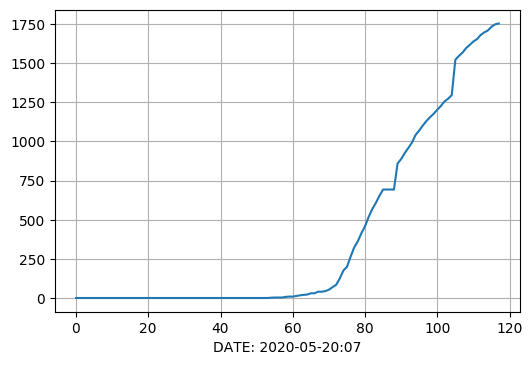

In [136]:
from __future__ import division
import sys
import glob
import time
import os
import matplotlib
import matplotlib.pyplot as plt
#%matplotlib inline 
import numpy as np 

e = len(deaths)
print (e)
ss = range(0,e)
x= np.asarray(ss)
y = np.array(deaths,dtype=np.int)


fig, ax = plt.subplots(dpi=100)

ax.plot(x, y)
DT = time.strftime("%Y-%m-%d:%H")
ax.set(xlabel='DATE: '+DT)
ax.grid()
tm = time.strftime("%Y-%m%d%H%M%S")
Filename = tm+".png"
print (Filename)
fig.savefig(Filename)
plt.show()


In [137]:
!ls COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/05*

COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/05-01-2020.csv
COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/05-02-2020.csv
COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/05-03-2020.csv
COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/05-04-2020.csv
COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/05-05-2020.csv
COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/05-06-2020.csv
COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/05-07-2020.csv
COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/05-08-2020.csv
COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/05-09-2020.csv
COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/05-10-2020.csv
COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/05-11-2020.csv
COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/05-12-2020.csv
COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/05-13-2020.csv
COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/05-14-2020.csv
COVID-



 101
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 28, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0]


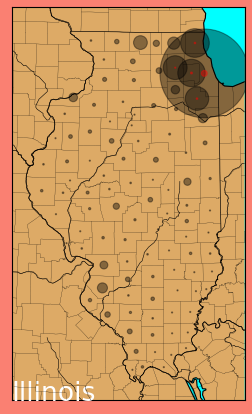

In [139]:
import warnings
warnings.filterwarnings("ignore")
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from matplotlib.pyplot import text
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.font_manager import FontProperties
"""
When I tried to draw counties, I got error: basemap 'utf-8' codec can't decode byte 0xf1 in position
Answered on https://stackoverflow.com/questions/45660904/matplotlib-basemap-drawcounties-having-issues

Budi said, for me, i change return v.decode(encoding, encodingErrors) to return v.decode('latin-1') and it's works,, – Budi Mulyo May 27 '19 at 8:12

My file looked different than you described: so I opened /miniconda3/lib/python3.7/site-packages/shapefile.py and replaced all instances of 'utf-8' with 'latin-1' Itt works fine now. 
Thank you very much. – JackNorthrup 3 mins ago

"""
LASTFILE="COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/05-18-2020.csv"

DataIn = open(LASTFILE).readlines()
LAT=[]
LONG=[]
STATES=[]
cases=[]
deaths =[]
longitude = ""
search = "Illinois"
for line in DataIn:
    line=line.replace("\n","")
    line = line.lstrip(",")
    line = line.split(",")
    if search in line[2] and "-" in (line[6]):
        #print(line[2],line[1],line[3],line[4],line[5],line[6],line[7],line[8],line[9],line[10])
        STATES.append(text)
        LAT.append(line[5])
        LONG.append(line[6])
        cases.append(line[7])
        deaths.append(line[8])
        longitude = longitude+line[6]+","
print("\n\n",len(STATES))        
LT = np.array(LAT,dtype=np.float)
LG = np.array(LONG,dtype=np.float)
fig = plt.figure(num=None, figsize=(10,8), dpi=80, facecolor='salmon')
urcrnrlat=max(LT)+.5
llcrnrlat=min(LT)-.5
urcrnrlon=max(LG)+.8
llcrnrlon=min(LG)-.5
lat_0 = (urcrnrlat+llcrnrlat)/2
lon_0 =(urcrnrlon+llcrnrlon)/2
# make up some data for scatter plot
lats = LT
lons = LG

fig = plt.gcf()
fig.set_size_inches(8, 6.5)


m = Basemap(llcrnrlon,llcrnrlat,urcrnrlon,urcrnrlat,
             resolution='i', projection='tmerc', lat_0 = lat_0, lon_0 = lon_0)

m.readshapefile(r'ShapeFiles/state_bounds', 'Neighborhoods')
m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='#ddaa66',lake_color='aqua')
m.drawcoastlines()
m.drawrivers()
#m.drawcounties(linewidth=0.1, linestyle='solid', color='k', antialiased=1, facecolor='none', ax=None, zorder=None, drawbounds=False)
m.drawcounties(zorder=20)
S=1
Size=[]
for x in cases:
    S=1+(float(x)*.1)
    Size.append(int(S))
    #print(int(S))
s = np.array(Size)

Sd=0
Sized=[]
for xd in deaths:
    Sd=0+(float(xd)*.01)
    Sized.append(int(Sd))
    #print(int(S))
sd = np.array(Sized)
print(Sized)

x, y = m(lons, lats)  # transform coordinates 
plt.scatter(x, y,  s=s, color="black", zorder=3, alpha=.4)
plt.scatter(x, y,  s=sd, color="red", zorder=6,  alpha=.4)
plt.text(urcrnrlon,urcrnrlat, search, color='white', fontsize=24)
plt.savefig("BaseMap/"+search+"Counties__.png", dpi=120, facecolor='salmon', edgecolor='b',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches="tight", pad_inches=0.2,
        frameon=None, metadata=None)
plt.show()

In [25]:
DATA =[]
import numpy as np
cnt = 0
for rows in ALLdata[1:]:
    
    cnt=cnt+1
    arr = [int(r) for r in rows[13:]]
    DATA.append(arr)

data = [sum(x) for x in zip(*DATA)]
print (cnt,data)

3261 [335436577, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 6, 7, 11, 12, 14, 17, 21, 22, 28, 32, 41, 50, 56, 70, 98, 132, 190, 267, 364, 454, 597, 781, 1008, 1316, 1729, 2265, 2886, 3521, 4319, 5536, 6737, 8290, 9576, 10837, 12246, 13897, 16192, 18279, 20270, 22337, 24341, 26087, 27870, 30268, 32739, 34830, 37414, 39755, 40946, 42660, 45085, 47421, 49732, 51499, 53757, 54881, 56221, 58355, 60973, 62998, 64944, 66371, 67682, 68924, 71064, 73458, 75667, 77181, 78798, 79529, 80684, 82377, 84121, 85903, 87530, 88755, 89563]


In [29]:
cnt=0
print (ALLdata[233][0],ALLdata[233][1],ALLdata[233][2],ALLdata[233][3],ALLdata[233][4])
print (ALLdata[233][5],ALLdata[233][6],ALLdata[233][7],ALLdata[233][8],ALLdata[233][9])
data = list(map(int, ALLdata[233][14:]))
print (data)

84006083 US USA 840 6083.0
Santa Barbara California US 34.65329488 -120.0188492
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 4, 4, 4, 5, 5, 6, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 9, 9, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11]


In [33]:
DATA =[]
import numpy as np
cnt = 0
state = "Ohio"
for i in range(1,len(ALLdata)):
    if ALLdata[i][6] == state:
        arr = [int(r) for r in ALLdata[i][14:]]
        DATA.append(arr)
        print ("\n",ALLdata[i][5],ALLdata[i][6],ALLdata[i][7],ALLdata[i][8],"\n",arr)
        
data = [sum(x) for x in zip(*DATA)]
print ("\nData:",data)


 Adams Ohio US 38.84541072 
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

 Allen Ohio US 40.77285242 
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 4, 4, 4, 6, 9, 11, 11, 11, 12, 12, 14, 15, 17, 18, 18, 19, 22, 23, 23, 23, 23, 23, 25, 28, 28, 29, 29, 29, 29, 30, 30, 30, 30, 30, 30, 30]

 Ashland Ohio US 40.84772277 
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [43]:
DATA =[]
import numpy as np
cnt = 0
state = "Ohio"
for i in range(1,len(ALLdata)):
    if ALLdata[i][6] == state:
        print(ALLdata[i][14:])

['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1']
['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '2'

In [55]:
DATA =[]
import numpy as np
cnt = 0
state = "Ohio"
for i in range(1,len(ALLdata)):
    if ALLdata[i][6] == state:
        for rows in ALLdata[i][6]:
            cnt=cnt+1
            arr = list(int(r) for r in ALLdata[i][14:])
            DATA.append(arr)


data = [sum(x) for x in zip(*DATA)]
#print data[-1],rows[5],rows[6],rows[7],rows[8],data
print (data)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 12, 12, 12, 24, 32, 44, 60, 76, 100, 116, 160, 220, 260, 324, 364, 408, 476, 568, 668, 772, 852, 924, 988, 1012, 1096, 1296, 1448, 1628, 1672, 1804, 1884, 2036, 2228, 2440, 2624, 2760, 2844, 2912, 3012, 3196, 3748, 3904, 4012, 4088, 4156, 4228, 4540, 4900, 5084, 5224, 5324, 5364, 5428, 5744, 5932, 6136, 6324, 6440, 6500, 6628]


In [58]:
print(len(DATA))

360


In [54]:
DATA =[]
import numpy as np
cnt = 0
i =233

for rows in ALLdata[i:]:
    cnt=cnt+1
    arr = [int(r) for r in rows[14:]]
    DATA.append(arr)

data = [sum(x) for x in zip(*DATA)]
print (data[-1],rows[5],rows[6],rows[7],rows[8],data)

85225 Weber-Morgan Utah US 41.27116049 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 6, 7, 10, 11, 13, 16, 20, 21, 27, 29, 38, 47, 54, 67, 93, 124, 180, 255, 348, 435, 571, 750, 970, 1263, 1661, 2175, 2786, 3401, 4173, 5354, 6518, 8016, 9265, 10478, 11825, 13439, 15663, 17665, 19581, 21600, 23563, 25256, 26957, 29275, 31647, 33621, 36106, 38298, 39446, 41108, 43439, 45614, 47787, 49443, 51629, 52703, 53983, 56021, 58514, 60429, 62249, 63615, 64887, 66058, 68016, 70270, 72356, 73712, 75233, 75926, 77004, 78550, 80171, 81809, 83325, 84454, 85225]


In [ ]:
DATA =[]
import numpy as np
cnt = 0
for rows in ALLdata[1:]:
    cnt=cnt+1
    #if rows[6] == "Florida":
    if cnt<1:  
        arr = [int(r) for r in rows[14:]]
        DATA.append(arr)

data = [sum(x) for x in zip(*DATA)]
print data[-1],rows[6],data

In [172]:
STATE=[]
DATA =[]
import numpy as np
cnt = 0
for rows in ALLdata:
    cnt=cnt+1
    if rows[6] == "Florida":
        arr = [int(r) for r in rows[14:]]
        DATA.append(arr)

data = [sum(x) for x in zip(*DATA)]
#print rows[6],data
STATE.append([[str(rows[6])],data])
print STATE

[[['Utah'], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 3, 3, 5, 7, 9, 11, 13, 13, 18, 18, 23, 29, 35, 54, 56, 63, 85, 87, 164, 170, 195, 221, 236, 283, 309, 354, 390, 438, 461, 499, 571, 596, 668, 725, 748, 774, 822, 867, 893, 987, 1046, 1055, 1075, 1088, 1171, 1218, 1268, 1314, 1364, 1379, 1399, 1471, 1539, 1600, 1669, 1715, 1721, 1735]]]


In [175]:
TX=["Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware", "Florida", "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana", "Maine", "Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada", "New Hampshire", "New Jersey", "New Mexico", "New York", "North Carolina", "North Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Vermont", "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming"]

print TX[2]

Arizona


In [184]:
import requests as req
URL="https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"
resp = req.get(URL)
OWID = []
text = resp.content
data=text.splitlines()
cnt=0
for line in data:
    cnt=cnt+1
    if cnt<5:
        # remove the b' before the line
        line = line.decode('utf-8') 
        OWID.append([line])

In [185]:
print OWID[0]

[u'iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,tests_units,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k']


In [183]:
STATE=[]
DATA =[]
import numpy as np
cnt = 0
TX=["Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware", "Florida", "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana", "Maine", "Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada", "New Hampshire", "New Jersey", "New Mexico", "New York", "North Carolina", "North Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Vermont", "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming"]


for i in range(0,len(TX)):
    #print TX[i]
    cnt=0
    for rows in ALLdata[1:]:
        DATA=[]
        if rows[6] == TX[i]:
            cnt=cnt+1
            arr = [int(r) for r in rows[14:]]
            DATA.append(arr)
            line = rows[5],rows[6],arr
        data = [sum(x) for x in zip(*DATA)]   

1 Autauga Alabama [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 3, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4]
2 Baldwin Alabama [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6]
3 Barbour Alabama [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

4 Out of DE Delaware [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
5 Unassigned Delaware [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 3, 0, 0, 2, 2, 2, 0, 0, 3, 7, 16, 0, 2, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1 Alachua Florida [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

1 Adair Iowa [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2 Adams Iowa [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
3 Allamakee Iowa [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 

109 Taylor Kentucky [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
110 Todd Kentucky [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
111 Trigg Kentucky [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

44 Lowndes Mississippi [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3]
45 Madison Mississippi [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 6, 7, 8, 8, 8, 8, 9, 10, 11, 11, 12, 12, 12, 12, 12]
46 Marion Mississippi [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

25 San Juan New Mexico [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 7, 10, 10, 13, 14, 15, 17, 17, 22, 24, 27, 33, 35, 35, 36, 38, 45, 49, 51, 57, 57, 62, 62, 62, 64, 69, 71, 71]
26 San Miguel New Mexico [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
27 Santa Fe New Mexico [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

12 Choctaw Oklahoma [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
13 Cimarron Oklahoma [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
14 Cleveland Oklahoma [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 3, 3, 5, 5, 5, 6, 6, 6, 7, 8, 11, 11, 12, 14, 14, 14, 17, 17, 17, 17, 18, 21

22 Brewster Texas [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
23 Briscoe Texas [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
24 Brooks Texas [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

1 Adams Washington [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2 Asotin Washington [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
3 Benton Washington [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 3, 3, 3, 4, 4, 5, 5, 5, 6, 7, 9, 13, 13, 13, 17, 19, 19, 25, 25, 25, 25, 27, 29, 29, 34, 

In [177]:
STATE=[]
DATA =[]
import numpy as np
cnt = 0
TX=["Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware", "Florida", "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana", "Maine", "Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada", "New Hampshire", "New Jersey", "New Mexico", "New York", "North Carolina", "North Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Vermont", "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming"]


for i in range(0,len(TX)):
    for rows in ALLdata[1:]:
        cnt=cnt+1
        if rows[6] == TX[i]:
            arr = [int(r) for r in rows[14:]]
            DATA.append(arr)

    data = [sum(x) for x in zip(*DATA)]
    #print rows[6],data
    STATE.append([[str(rows[6])],data])
    print STATE

[[['Utah'], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 4, 4, 10, 10, 23, 27, 32, 38, 44, 45, 49, 64, 66, 70, 80, 92, 93, 99, 114, 118, 133, 148, 153, 157, 163, 183, 196, 202, 209, 209, 219, 228, 242, 256, 272, 289, 288, 290, 298, 315, 343, 369, 383, 390, 393, 403]]]
[[['Utah'], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 4, 4, 10, 10, 23, 27, 32, 38, 44, 45, 49, 64, 66, 70, 80, 92, 93, 99, 114, 118, 133, 148, 153, 157, 163, 183, 196, 202, 209, 209, 219, 228, 242, 256, 272, 289, 288, 290, 298, 315, 343, 369, 383, 390, 393, 403]], [['Utah'], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

[[['Utah'], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 4, 4, 10, 10, 23, 27, 32, 38, 44, 45, 49, 64, 66, 70, 80, 92, 93, 99, 114, 118, 133, 148, 153, 157, 163, 183, 196, 202, 209, 209, 219, 228, 242, 256, 272, 289, 288, 290, 298, 315, 343, 369, 383, 390, 393, 403]], [['Utah'], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 5, 6, 12, 13, 26, 30, 35, 41, 49, 51, 55, 70, 73, 77, 87, 100, 101, 107, 123, 127, 142, 157, 162, 166, 172, 192, 205, 211, 218, 218, 228, 237, 251, 265, 281, 298, 297, 299, 307, 324, 353, 379, 393, 400, 403, 413]], [['Utah'], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

[[['Utah'], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 4, 4, 10, 10, 23, 27, 32, 38, 44, 45, 49, 64, 66, 70, 80, 92, 93, 99, 114, 118, 133, 148, 153, 157, 163, 183, 196, 202, 209, 209, 219, 228, 242, 256, 272, 289, 288, 290, 298, 315, 343, 369, 383, 390, 393, 403]], [['Utah'], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 5, 6, 12, 13, 26, 30, 35, 41, 49, 51, 55, 70, 73, 77, 87, 100, 101, 107, 123, 127, 142, 157, 162, 166, 172, 192, 205, 211, 218, 218, 228, 237, 251, 265, 281, 298, 297, 299, 307, 324, 353, 379, 393, 400, 403, 413]], [['Utah'], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

[[['Utah'], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 4, 4, 10, 10, 23, 27, 32, 38, 44, 45, 49, 64, 66, 70, 80, 92, 93, 99, 114, 118, 133, 148, 153, 157, 163, 183, 196, 202, 209, 209, 219, 228, 242, 256, 272, 289, 288, 290, 298, 315, 343, 369, 383, 390, 393, 403]], [['Utah'], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 5, 6, 12, 13, 26, 30, 35, 41, 49, 51, 55, 70, 73, 77, 87, 100, 101, 107, 123, 127, 142, 157, 162, 166, 172, 192, 205, 211, 218, 218, 228, 237, 251, 265, 281, 298, 297, 299, 307, 324, 353, 379, 393, 400, 403, 413]], [['Utah'], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

[[['Utah'], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 4, 4, 10, 10, 23, 27, 32, 38, 44, 45, 49, 64, 66, 70, 80, 92, 93, 99, 114, 118, 133, 148, 153, 157, 163, 183, 196, 202, 209, 209, 219, 228, 242, 256, 272, 289, 288, 290, 298, 315, 343, 369, 383, 390, 393, 403]], [['Utah'], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 5, 6, 12, 13, 26, 30, 35, 41, 49, 51, 55, 70, 73, 77, 87, 100, 101, 107, 123, 127, 142, 157, 162, 166, 172, 192, 205, 211, 218, 218, 228, 237, 251, 265, 281, 298, 297, 299, 307, 324, 353, 379, 393, 400, 403, 413]], [['Utah'], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

[[['Utah'], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 4, 4, 10, 10, 23, 27, 32, 38, 44, 45, 49, 64, 66, 70, 80, 92, 93, 99, 114, 118, 133, 148, 153, 157, 163, 183, 196, 202, 209, 209, 219, 228, 242, 256, 272, 289, 288, 290, 298, 315, 343, 369, 383, 390, 393, 403]], [['Utah'], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 5, 6, 12, 13, 26, 30, 35, 41, 49, 51, 55, 70, 73, 77, 87, 100, 101, 107, 123, 127, 142, 157, 162, 166, 172, 192, 205, 211, 218, 218, 228, 237, 251, 265, 281, 298, 297, 299, 307, 324, 353, 379, 393, 400, 403, 413]], [['Utah'], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [172]:
STATE=[]
DATA =[]
import numpy as np
cnt = 0
for rows in ALLdata[1:]:
    cnt=cnt+1
    arr = [int(r) for r in rows[14:]]
    DATA.append(arr)

data = [sum(x) for x in zip(*DATA)]
#print rows[6],data
STATE.append([[str(rows[6])],data])
print STATE

[[['Utah'], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 3, 3, 5, 7, 9, 11, 13, 13, 18, 18, 23, 29, 35, 54, 56, 63, 85, 87, 164, 170, 195, 221, 236, 283, 309, 354, 390, 438, 461, 499, 571, 596, 668, 725, 748, 774, 822, 867, 893, 987, 1046, 1055, 1075, 1088, 1171, 1218, 1268, 1314, 1364, 1379, 1399, 1471, 1539, 1600, 1669, 1715, 1721, 1735]]]


In [147]:
STATE=[]
DATA =[]
import numpy as np
cnt = 0
for rows in ALLdata:
    cnt=cnt+1
    if cnt>1:
        arr = [int(r) for r in rows[14:]]
        print "-",
        DATA.append(arr)

    data = [sum(x) for x in zip(*DATA)]
    print " . ",
    STATE.append([str(rows[6])]+data)


 .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  

 .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  

 .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  -  .  

In [158]:
print STATE[233][0]
print STATE[233][1:]
print STATE[233][-1]

California
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 2, 3, 5, 8, 10, 12, 16, 19, 26, 31, 38, 53, 68, 90, 100, 120, 146, 182, 219, 275, 312, 360, 422, 460, 531, 616, 691, 739, 780, 833, 915, 995, 1094, 1211, 1311, 1460, 1504, 1556, 1650, 1812, 1950, 2062, 2135, 2185, 2245, 2341, 2467, 2577, 2703, 2764, 2803, 2874, 3056, 3197, 3320, 3479, 3576, 3614]
3614


In [174]:
for i in range(0,len(STATE)):
    if "Ohio" == STATE[i][0]:
        print i,STATE[i][0:]

In [94]:
cnt = 0
for rows in ALLdata:
    cnt=cnt+1
    if cnt<5:
        print cnt,rows
        print " "

1 [u'UID', u'iso2', u'iso3', u'code3', u'FIPS', u'Admin2', u'Province_State', u'Country_Region', u'Lat', u'Long_', u'Combined_Key', u'Population', u'1/22/20', u'1/23/20', u'1/24/20', u'1/25/20', u'1/26/20', u'1/27/20', u'1/28/20', u'1/29/20', u'1/30/20', u'1/31/20', u'2/1/20', u'2/2/20', u'2/3/20', u'2/4/20', u'2/5/20', u'2/6/20', u'2/7/20', u'2/8/20', u'2/9/20', u'2/10/20', u'2/11/20', u'2/12/20', u'2/13/20', u'2/14/20', u'2/15/20', u'2/16/20', u'2/17/20', u'2/18/20', u'2/19/20', u'2/20/20', u'2/21/20', u'2/22/20', u'2/23/20', u'2/24/20', u'2/25/20', u'2/26/20', u'2/27/20', u'2/28/20', u'2/29/20', u'3/1/20', u'3/2/20', u'3/3/20', u'3/4/20', u'3/5/20', u'3/6/20', u'3/7/20', u'3/8/20', u'3/9/20', u'3/10/20', u'3/11/20', u'3/12/20', u'3/13/20', u'3/14/20', u'3/15/20', u'3/16/20', u'3/17/20', u'3/18/20', u'3/19/20', u'3/20/20', u'3/21/20', u'3/22/20', u'3/23/20', u'3/24/20', u'3/25/20', u'3/26/20', u'3/27/20', u'3/28/20', u'3/29/20', u'3/30/20', u'3/31/20', u'4/1/20', u'4/2/20', u'4/3/20'

In [95]:
cnt = 0
for rows in ALLdata:
    cnt=cnt+1
    if cnt>50 and cnt<55:
        print cnt,rows[6],rows[13:]
        print " "

51 Alabama [u'372909', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'1', u'1', u'1', u'1', u'1', u'1', u'1', u'1', u'1', u'1', u'2', u'2', u'2', u'3', u'3', u'3', u'3', u'3', u'3', u'3', u'4', u'4', u'4', u'4', u'4', u'4', u'4', u'4', u'4', u'4', u'4', u'4', u'4', u'4', u'4', u'4', u'4', u'4', u'4', u'4', u'4', u'4', u'4', u'4', u'4', u'4']
 
52 Alabama [u'18863', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0',

In [173]:
cnt = 0
WholeState=[]
for rows in ALLdata:
    cnt=cnt+1
    if rows[6] == "Florida":
        INT = map(int, rows[14:])
        WholeState.append(INT)
        print WholeState

TypeError: input must be an array, list, tuple or scalar

In [65]:
res = [sum(x) for x in zip(*WholeState)]
print res

[]


In [66]:
import requests as req
import time
DATE = time.strftime("%m-%d-%H_")
ALLdata=[]
STATE = "Florida"
URL ="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv"

STATE = "Florida"

resp = req.get(URL)
content = resp.text

#clean the content, then break the content into lines 
content=content.replace(",,",",Ex,")
content=content.replace("(","")
content=content.replace(")","")
content=content.replace("\"","")
lines= content.splitlines()
# loop the lines one line at a time
# split each line at the delimiter ` , ` 
# then append the empty list 'ALLdata' with the line (which is now a list):  [line]  
for line in lines:
    line= line.split(",")
    ALLdata.append(line)


WholeState=[]
for rows in ALLdata:
    if rows[6] == STATE:
        INT = map(int, rows[14:])
        WholeState.append(INT)
        
LOCATION = []        
for rows in ALLdata:
    if rows[6] == STATE:
        LOCATION.append([float(rows[9]),float(rows[8])])        

data = [sum(x) for x in zip(*WholeState)]
print(data)
print(LOCATION)

TypeError: input must be an array, list, tuple or scalar

In [92]:
StateData=[]
STATE="Ohio"
for rows in ALLdata:
    if rows[6] == STATE:
        INT = map(int, rows[14:])
        # Notice the Deaths are in First Column ( Easy to sort high to low )
        StateData.append([int(rows[-1]),rows[5],rows[6],float(rows[9]),float(rows[8]),INT])

cnt=0
for row in sorted(StateData, reverse=True):
    if cnt==0:print row[0],row[1],row[2],row[3],row[4],row[5]
    if cnt==1:print row[0],row[1],row[2],row[3],row[4],row[5]
    if cnt==2:print row[0],row[1],row[2],row[3],row[4],row[5]
    cnt=cnt+1

TypeError: input must be an array, list, tuple or scalar

In [11]:
print len(StateData)
print(StateData[1])
print "---------------"
print(StateData[1][0])
print "---------------"
print(StateData[1][1])
print "---------------"
print(StateData[1][2])
print "---------------"
print(StateData[1][3])
print "---------------"
print(StateData[1][4])
print "---------------"
print(StateData[1][5])


90
[29, u'Allen', u'Ohio', -84.10802343, 40.77285242, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 4, 4, 4, 6, 9, 11, 11, 11, 12, 12, 14, 15, 17, 18, 18, 19, 22, 23, 23, 23, 23, 23, 25, 28, 28, 29, 29, 29]]
---------------
29
---------------
Allen
---------------
Ohio
---------------
-84.10802343
---------------
40.77285242
---------------
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 4, 4, 4, 6, 9, 11, 11, 11, 12, 12, 14, 15, 17, 18, 18, 19, 22, 23, 23, 23, 23, 23, 25, 28, 28, 29, 29, 29]


## ALLdata[1:] will skip the header

In [168]:
StateData=[]
for rows in ALLdata[1:]:
    INT = map(int, rows[14:])
    # Notice the Deaths are in First Column ( Easy to sort high to low )
    StateData.append([int(rows[-1]),rows[5],rows[6],float(rows[9]),float(rows[8]),INT])

cnt=0
for row in sorted(StateData, reverse=True):
    if cnt<20:print row[0],row[1],row[2],row[3],row[4],row[5]
    cnt=cnt+1

TypeError: input must be an array, list, tuple or scalar

In [167]:
HighestCounts=[]
CNT=0
cnt=0
StateData=[]
for rows in ALLdata[1:]:
    print str(rows[14:])
    INT = map(int, rows[14:])
    # Notice the Deaths are in First Column ( Easy to sort high to low )
    StateData.append([int(rows[-1]),rows[5],rows[6],float(rows[9]),float(rows[8]),INT])

cnt=0
for row in sorted(StateData, reverse=True):
    if cnt<50:HighestCounts.append([row[0],row[1],row[2],row[3],row[4],row[5]])
    cnt=cnt+1
    
cnt=0
for row in sorted(HighestCounts, reverse=True):
    cnt=cnt+1
    print str(cnt)+": ",row

[u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0', u'0']


TypeError: input must be an array, list, tuple or scalar

In [165]:
cnt=0
for i in range(0,len(HighestCounts)):
    deaths = HighestCounts[i][0]
    county = HighestCounts[i][1]
    state = HighestCounts[i][2]
    longitude = HighestCounts[i][3]
    latitude = HighestCounts[i][4]
    print deaths,county,state,longitude,latitude
    

In [15]:
HighestCounts=[]
CNT=0
for i in range(0,len(ALLdata[1:])):
    StateData=[]
    for rows in ALLdata[1:i]:
        #print(rows[0:])
        INT = map(int, rows[14:])
        # Notice the Deaths are in First Column ( Easy to sort high to low )
        StateData.append([INT[-1],rows[5],rows[6],float(rows[9]),float(rows[8]),INT])

cnt=0
for row in sorted(StateData, reverse=True):
    if cnt==0:HighestCounts.append([row[0],row[1],row[2],row[3],row[4],row[5]])
    cnt=cnt+1

KeyboardInterrupt: 

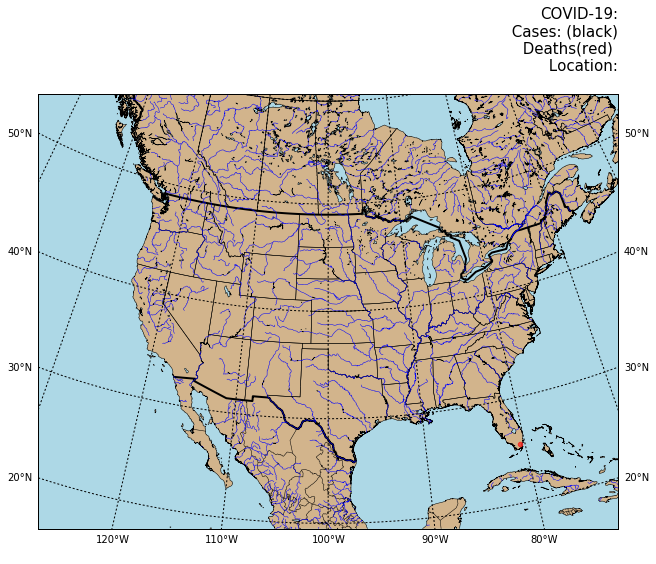

In [48]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon
import numpy as np
from PIL import Image,ImageFont,ImageDraw,ImageFilter,ImageChops
from random import randint
from mpl_toolkits.basemap import Basemap
fig = plt.figure(num=None, figsize=(12, 8) ) 
m = Basemap(width=6000000,height=4500000,resolution='h',projection='aea',lat_1=35.,lat_2=45,lon_0=-100,lat_0=40)
m.drawcoastlines(linewidth=0.5)
m.fillcontinents(color='tan',lake_color='lightblue')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,10.),labels=[True,True,False,False],dashes=[2,2])
m.drawmeridians(np.arange(-180.,181.,10.),labels=[False,False,False,True],dashes=[2,2])
m.drawmapboundary(fill_color='lightblue')
m.drawcountries(linewidth=2, linestyle='solid', color='k' ) 
m.drawstates(linewidth=0.5, linestyle='solid', color='k')
m.drawrivers(linewidth=0.5, linestyle='solid', color='blue')

'''
S=1
Size=[]
for x in deaths:
    S=1+(float(x)*.05)
    Size.append(int(S))
    #print(int(S))
s = np.array(Size)
'''
plt.title("COVID-19:\n Cases: (black)\n Deaths(red) \n Location:\n ", fontsize=15, loc='right')
#plt.text(max(LG-1.2),max(LT), search, color='white', fontsize=24)
#x, y = m(lons, lats)  # transform coordinates


plt.xlabel('Longitude',color="white", fontsize=24)
plt.ylabel('Latitute',color="white", fontsize=24)
x, y = m(-80.55170587, 25.6112362)
m.scatter(x, y, s=20, color='red', zorder=5, alpha=0.6)
#m.scatter(40.21053671, -75.36652296,  s=20, color='blue', zorder=5, alpha=0.6)
#m.scatter(x, y, s=sd, color='r', zorder=10,  alpha=0.6)

plt.savefig("BaseMap/EXP.png", dpi=120, facecolor='salmon', edgecolor='b',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches="tight", pad_inches=0.2,
        frameon=None, metadata=None)


In [ ]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon
import numpy as np
from PIL import Image,ImageFont,ImageDraw,ImageFilter,ImageChops
from random import randint
from mpl_toolkits.basemap import Basemap
fig = plt.figure(num=None, figsize=(12, 8) ) 
m = Basemap(width=6000000,height=4500000,resolution='h',projection='aea',lat_1=35.,lat_2=45,lon_0=-100,lat_0=40)
m.drawcoastlines(linewidth=0.5)
m.fillcontinents(color='tan',lake_color='lightblue')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,10.),labels=[True,True,False,False],dashes=[2,2])
m.drawmeridians(np.arange(-180.,181.,10.),labels=[False,False,False,True],dashes=[2,2])
m.drawmapboundary(fill_color='lightblue')
m.drawcountries(linewidth=2, linestyle='solid', color='k' ) 
m.drawstates(linewidth=0.5, linestyle='solid', color='k')
m.drawrivers(linewidth=0.5, linestyle='solid', color='blue')
def RndState():
    TX=["Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware", "Florida", "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana", "Maine", "Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada", "New Hampshire", "New Jersey", "New Mexico", "New York", "North Carolina", "North Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Vermont", "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming"]
    x=randint(1,49)
    return TX[x]

search = RndState()
LASTFILE="COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/05-08-2020.csv"
#LASTFILE="csse_covid_19_data/csse_covid_19_daily_reports/03-30-2020.csv"
DataIn = open(LASTFILE).readlines()
LAT=[]
LONG=[]
LATd=[]
LONGd=[]
STATES=[]
cases=[]
deaths =[]
longitude = ""
search = RndState()
for line in DataIn:
    line=line.replace("\n","")
    line = line.lstrip(",")
    line = line.split(",")
    if search in line[2] and "-" in (line[6]):
        text=line[2],line[1],line[3],line[4],line[5],line[6],line[7],line[8],line[9],line[10]
        STATES.append(text)
        LAT.append(line[5])
        LONG.append(line[6])
        if int(line[8])>0:
            LATd.append(line[5])
            LONGd.append(line[6])        
        cases.append(line[7])
        deaths.append(line[8])
        longitude = longitude+line[6]+","
print(len(STATES))        
LT = np.array(LAT,dtype=np.float)
LG = np.array(LONG,dtype=np.float)
LTd = np.array(LATd,dtype=np.float)
LGd = np.array(LONGd,dtype=np.float)

S=1
Size=[]
for x in cases:
    S=1+(float(x)*.05)
    Size.append(int(S))
    #print(int(S))
s = np.array(Size)

Sd=0
Sized=[]
for xd in deaths:
    Sd=0+(float(xd)+.05)
    Sized.append(int(Sd))
    #print(int(S))
sd = np.array(Sized)
#print(Sized)
plt.title("COVID-19:\n Cases: (black)\n Deaths(red) \n Location:\n "+search+"\n", fontsize=15, loc='right')
#plt.text(max(LG-1.2),max(LT), search, color='white', fontsize=24)
#x, y = m(lons, lats)  # transform coordinates
x, y = m(LGd, LTd)
xx,yy = m(LG, LT)
plt.xlabel('Longitude',color="white", fontsize=24)
plt.ylabel('Latitute',color="white", fontsize=24)

m.scatter(xx, yy, s=s, color='black', zorder=5, alpha=0.6)
m.scatter(x, y, s=sd, color='r', zorder=10,  alpha=0.6)

plt.savefig("BaseMap/"+search+"Hotspots1__.png", dpi=120, facecolor='salmon', edgecolor='b',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches="tight", pad_inches=0.2,
        frameon=None, metadata=None)


In [84]:
StateData=[]
STATE="Ohio"
for rows in ALLdata:
    if rows[6] == STATE:
        INT = map(int, rows[14:])
        StateData.append([rows[5],rows[6],int(rows[-1]),float(rows[9]),float(rows[8]),INT])
print StateData        

[[u'Adams', u'Ohio', 0, -83.4718964, 38.84541072, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], [u'Allen', u'Ohio', 29, -84.10802343, 40.77285242, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 4, 4, 4, 6, 9, 11, 11, 11, 12, 12, 14, 15, 17, 18, 18, 19, 22, 23, 23, 23, 23, 23, 25, 28, 28, 29, 29, 29]], [u'Ashland', u'Ohio', 0, -82.27280781, 40.84772277, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [33]:
import requests as req
import time
DATE = time.strftime("%m-%d-%H_")
URL ="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv"

resp = req.get(URL)
content = resp.text

#create a date oriented filename and print it
filename=str(DATE)+"_"+URL[-21:]
print(filename)
content=content.replace(",,",",Ex,")
content=content.replace("(","")
content=content.replace(")","")
content=content.replace("\"","")
print(content)
# Open a file using the new filename and write the content of the 'gitfile' to it.
# Update one time daily
TEMP = open(filename,"w")
TEMP.write(content)
TEMP.close()

05-12-06__covid19_deaths_US.csv
UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20
16,AS,ASM,16,60.0,Ex,America

In [13]:
LASTFILE="05-11-13__covid19_deaths_US.csv"
DataIn = open(LASTFILE).readlines()
LAT=[]
LONG=[]
LATd=[]
LONGd=[]
STATES=[]
cases=[]
deaths =[]
longitude = ""
search = RndState()
for line in DataIn:
    print(line)
    line=line.replace("\n","")
    line = line.lstrip(",")
    line = line.split(",")
    if search in line[2] and "-" in (line[6]):
        text=line[2],line[1],line[3],line[4],line[5],line[6],line[7],line[8],line[9],line[10]
        STATES.append(text)
        LAT.append(line[5])
        LONG.append(line[6])
        if int(line[8])>0:
            LATd.append(line[5])
            LONGd.append(line[6])        
        cases.append(line[7])
        deaths.append(line[8])
        longitude = longitude+line[6]+","
print(len(STATES))        

UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20

16,AS,ASM,16,60.0,Ex,American Samoa,US,-14.270999999999999,

84036083,US,USA,840,36083.0,Rensselaer,New York,US,42.71348136,-73.51089874,Rensselaer, New York, US,158714,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,3,5,5,5,5,6,6,6,6,6,6,6,6,6,9,10,11,11,11,11,11,11,11,11,11,11,23,23,23,23,23,23,23

84036085,US,USA,840,36085.0,Richmond,New York,US,40.58582155,-74.14808598,Richmond, New York, US,476143,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

84036087,US,USA,840,36087.0,Rockland,New York,US,41.15027894,-74.02560498,Rockland, New York, US,325789,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,5,5,5,7,8,8,8,8,18,18,42,69,69,119,135,154,172,200,200,200,241,263,298,319,319,334,334,334,401,401,4

56
drawing image from arcGIS server... ...finished


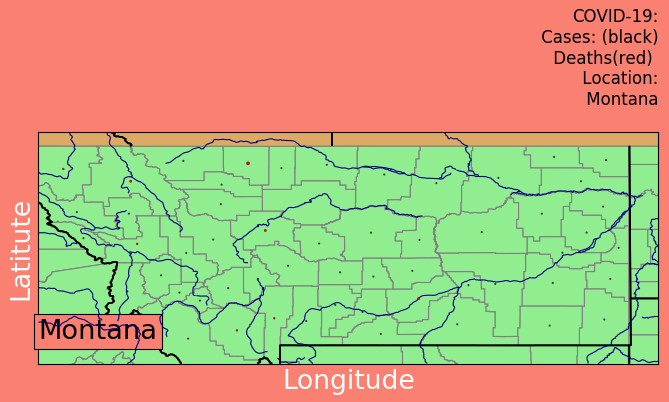

In [28]:
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon
import numpy as np
from PIL import Image,ImageFont,ImageDraw,ImageFilter,ImageChops
from random import randint
from mpl_toolkits.basemap import Basemap
#prevents a warning from using Python3 instaead of Python2
import warnings
from RandomState import *
warnings.filterwarnings("ignore")
import sys
sys.path.insert(1, "/home/jack/hidden")
import Key
import twython
from twython import Twython
# Make the figure
#fig = plt.figure()
#ax = fig.add_subplot(111)

# Easiest way to make a basemap is to use the cylidrical projection and 
# define the bottom left lat/lon and top right lat/lon corners

def RndState():
    TX=["Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware", "Florida", "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana", "Maine", "Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada", "New Hampshire", "New Jersey", "New Mexico", "New York", "North Carolina", "North Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Vermont", "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming"]
    x=randint(1,49)
    return TX[x]


LASTFILE="05-11-13__covid19_deaths_US.csv"
DataIn = open(LASTFILE).readlines()
LAT=[]
LONG=[]
LATd=[]
LONGd=[]
STATES=[]
cases=[]
deaths =[]

search = RndState()
for line in DataIn:
    line=line.replace("\n","")
    line = line.lstrip(",")
    line = line.split(",")
    if search in line[6] and "-" in (line[9]):
        text=line[2],line[1],line[3],line[4],line[5],line[6],line[7],line[8],line[9],line[10],line[11],line[12],line[13]
        #print(line)
        STATES.append(text)
        LAT.append(line[8])
        LONG.append(line[9])
        if int(float(line[8]))>0:
            LATd.append(float(line[8]))
            LONGd.append(float(line[9]))        
        cases.append(line[-1])
        deaths.append(line[-1])

print(len(STATES))



LT = np.array(LAT,dtype=np.float)
LG = np.array(LONG,dtype=np.float)
LTd = np.array(LATd,dtype=np.float)
LGd = np.array(LONGd,dtype=np.float)


fig = plt.figure(num=None, figsize=(10,8), dpi=80, facecolor='salmon')


urcrnrlat=max(LT)+.5
llcrnrlat=min(LT)-.5
urcrnrlon=max(LG)+.8
llcrnrlon=min(LG)-.5
lat_0 = (urcrnrlat+llcrnrlat)/2
lon_0 =(urcrnrlon+llcrnrlon)/2

# create the map object, m
m = Basemap(resolution='h', projection='cyl', \
    llcrnrlon=llcrnrlon, llcrnrlat=llcrnrlat, urcrnrlon=urcrnrlon, urcrnrlat=urcrnrlat)

# Note: You can define the resolution of the map you just created. Higher 
# resolutions take longer to create.
#    'c' - crude
#    'l' - low
#    'i' - intermediate
#    'h' - high
#    'f' - full

# Draw some map elements on the map
m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='#ddaa66',lake_color='aqua')
m.drawcoastlines()
m.drawrivers(linewidth=1.0,color='navy',zorder=8)
m.drawcounties(linewidth=1.0, linestyle='solid', color='gray', antialiased=1, facecolor='lightgreen', ax=None, zorder=2, drawbounds=True)
m.drawstates(linewidth=1.5, linestyle='solid', color='black', antialiased=1,zorder=2, )
plt.text(llcrnrlon,llcrnrlat+.5, search, color='black', fontsize=24.5, zorder=6,bbox=dict(facecolor='salmon'))

# Drawing ArcGIS Basemap (only works with cylc projections??)
# Examples of what each map looks like can be found here:
# http://kbkb-wx-python.blogspot.com/2016/04/python-basemap-background-image-from.html
maps = ['ESRI_Imagery_World_2D',    # 0
        'ESRI_StreetMap_World_2D',  # 1
        'NatGeo_World_Map',         # 2
        'NGS_Topo_US_2D',           # 3
        'Ocean_Basemap',            # 4
        'USA_Topo_Maps',            # 5
        'World_Imagery',            # 6
        'World_Physical_Map',       # 7
        'World_Shaded_Relief',      # 8
        'World_Street_Map',         # 9
        'World_Terrain_Base',       # 10
        'World_Topo_Map'            # 11
        ]
print ("drawing image from arcGIS server..."),
#m.arcgisimage(service=maps[8], xpixels=1000, verbose=False)
m.arcgisimage(service=maps[9], xpixels=3500, verbose=False)
print ("...finished")

S=1
Size=[]
for x in cases:
    S=1+(float(x)*.5)
    Size.append(int(S))
    #print(int(S))
s = np.array(Size)

Sd=0
Sized=[]
for xd in deaths:
    Sd=0+(float(xd))
    Sized.append(int(Sd))
    #print(int(S))
sd = np.array(Sized)
#print(Sized)
plt.title("COVID-19:\n Cases: (black)\n Deaths(red) \n Location:\n "+search+"\n", fontsize=15, loc='right')
#plt.text(max(LG-1.2),max(LT), search, color='white', fontsize=24)
#x, y = m(lons, lats)  # transform coordinates
x, y = m(LGd, LTd)
xx,yy = m(LG, LT)
plt.xlabel('Longitude',color="white", fontsize=24)
plt.ylabel('Latitute',color="white", fontsize=24)

m.scatter(xx, yy, s=s, color='black', zorder=5, alpha=0.6)
m.scatter(x, y, s=sd, color='r', zorder=10,  alpha=0.6)

#plt.text(urcrnrlon,urcrnrlat, search, color='white', fontsize=24)
plt.savefig("BaseMap/"+search+"arcGIS__.png", dpi=120, facecolor='salmon', edgecolor='b',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches="tight", pad_inches=0.2,
        frameon=None, metadata=None)

filename0 = "BaseMap/"+search+"arcGIS__.png"


def draw_blurred_back(img, position, text, font, col, halo_col):
    halo = Image.new('RGBA', img.size, (0, 0, 0, 0))
    ImageDraw.Draw(halo).text(position, text, font = font, fill = halo_col)
    blurred_halo = halo.filter(ImageFilter.BLUR)
    ImageDraw.Draw(blurred_halo).text(position, text, font = font, fill = col)
    return Image.composite(img, blurred_halo, ImageChops.invert(blurred_halo))

if __name__ == '__main__':
    
    basewidth = 720
    inp = Image.open(filename0)
    wpercent = (basewidth / float(inp.size[0]))
    hsize = int((float(inp.size[1]) * float(wpercent)))
    inp = inp.resize((basewidth, hsize), Image.ANTIALIAS)
    #img.save(resized_image.jpg')
    
    #inp = inp.resize((640,640), Image.ANTIALIAS)
    font = ImageFont.truetype("/home/jack/fonts/Exo-Black.ttf", 30)
    text_title = (255, 255,230) # bright green
    blur_title = (0, 0, 0)   # black

    i2 = draw_blurred_back(inp, (15, 30), "Plotting COVID-19 Data", font, text_title, blur_title)
    font0 = ImageFont.truetype("/home/jack/fonts/Exo-Black.ttf", 20)
    font1 = ImageFont.truetype("/home/jack/fonts/Exo-Black.ttf", 14)
    font2 = ImageFont.truetype("/home/jack/fonts/PatrickHand-Regular.ttf", 16)
    i2 = draw_blurred_back(i2, (15, 65), "Plot Using ArcGIS Basemap - "+search, font0, text_title, blur_title)
    TXT="https://github.com/JupyterJones/COVID-19-Jupyter-Notebooks"
    draw = ImageDraw.Draw(i2) 
    draw.text((15, 5), TXT, font = font2, align ="left",fill="black")
    #i2 = draw(i2, (15, 65),TXT, font1)    
    
    #txt = Image.new('RGBA', i.size, (255,255,255,0))

    # get a font
    fnt = ImageFont.truetype("/home/jack/fonts/Exo-Black.ttf", 20)
    # get a drawing context
    signature_ = "@jacklnorthrup" 
    #get length in pixel of signature_
    sizeS,ln = fnt.getsize(signature_)
    #add 15 pixels to right border
    pt = sizeS+25
    width, height = inp.size
    #marginx starting point of signature_
    marginx = pt
    #bottom margin
    marginy = 30
    x = width - marginx
    y = height - marginy
    

    text_sig = (255, 255,230) # bright green
    blur_sig = (0, 0, 0)   # black
    txt=draw_blurred_back(i2,(x,y), signature_, fnt, text_sig, blur_sig)
    out = Image.alpha_composite(i2, txt)
    out.save("images/TEMP_POST.png")

CONSUMER_KEY = Key.twiter()[0]
CONSUMER_SECRET = Key.twiter()[1]
ACCESS_KEY = Key.twiter()[2]
ACCESS_SECRET = Key.twiter()[3]
twitter = Twython(CONSUMER_KEY, CONSUMER_SECRET, ACCESS_KEY, ACCESS_SECRET)

STR = "#"+search+"  #arcGIS server #Basemap #COVID-19 - #Python  Plot data using "+TXT+" #JupyterJones" 

PATH = "images/TEMP_POST.png"
photo = open(PATH,'rb')
#response = twitter.upload_media(media=photo)
#twitter.update_status(status=STR, media_ids=[response['media_id']])

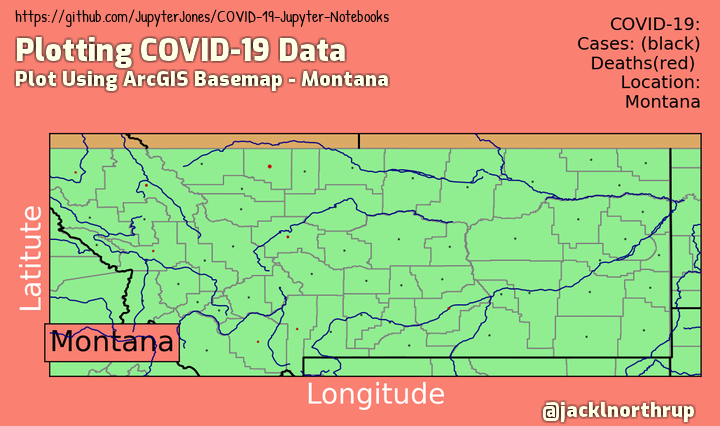

In [29]:
from PIL import Image
IM = Image.open(PATH)
IM

In [55]:
longitude = HighestCounts[i][3]
latitude = HighestCounts[i][4]

print latitude

36.21458855


52


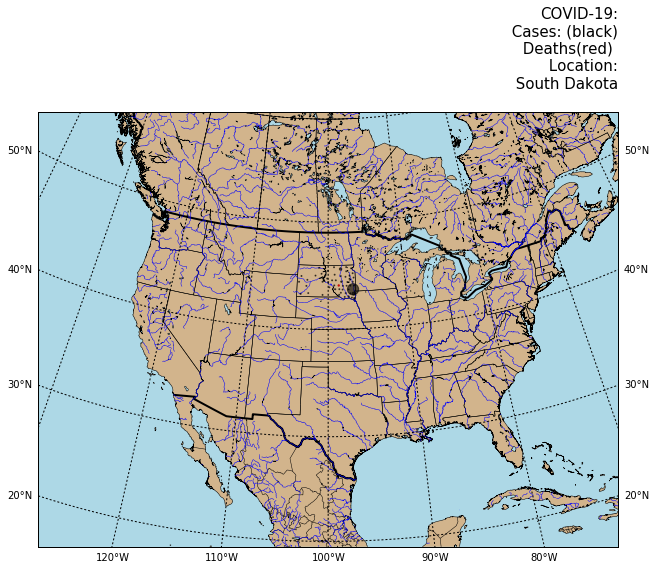

In [1]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon
import numpy as np
from PIL import Image,ImageFont,ImageDraw,ImageFilter,ImageChops
from random import randint
from mpl_toolkits.basemap import Basemap
fig = plt.figure(num=None, figsize=(12, 8) ) 
m = Basemap(width=6000000,height=4500000,resolution='h',projection='aea',lat_1=35.,lat_2=45,lon_0=-100,lat_0=40)
m.drawcoastlines(linewidth=0.5)
m.fillcontinents(color='tan',lake_color='lightblue')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,10.),labels=[True,True,False,False],dashes=[2,2])
m.drawmeridians(np.arange(-180.,181.,10.),labels=[False,False,False,True],dashes=[2,2])
m.drawmapboundary(fill_color='lightblue')
m.drawcountries(linewidth=2, linestyle='solid', color='k' ) 
m.drawstates(linewidth=0.5, linestyle='solid', color='k')
m.drawrivers(linewidth=0.5, linestyle='solid', color='blue')
def RndState():
    TX=["Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware", "Florida", "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana", "Maine", "Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada", "New Hampshire", "New Jersey", "New Mexico", "New York", "North Carolina", "North Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Vermont", "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming"]
    x=randint(1,49)
    return TX[x]

search = RndState()
LASTFILE="COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/05-08-2020.csv"
#LASTFILE="csse_covid_19_data/csse_covid_19_daily_reports/03-30-2020.csv"
DataIn = open(LASTFILE).readlines()
LAT=[]
LONG=[]
LATd=[]
LONGd=[]
STATES=[]
cases=[]
deaths =[]
longitude = ""
search = RndState()
for line in DataIn:
    line=line.replace("\n","")
    line = line.lstrip(",")
    line = line.split(",")
    if search in line[2] and "-" in (line[6]):
        text=line[2],line[1],line[3],line[4],line[5],line[6],line[7],line[8],line[9],line[10]
        STATES.append(text)
        LAT.append(line[5])
        LONG.append(line[6])
        if int(line[8])>0:
            LATd.append(line[5])
            LONGd.append(line[6])        
        cases.append(line[7])
        deaths.append(line[8])
        longitude = longitude+line[6]+","
print(len(STATES))        
LT = np.array(LAT,dtype=np.float)
LG = np.array(LONG,dtype=np.float)
LTd = np.array(LATd,dtype=np.float)
LGd = np.array(LONGd,dtype=np.float)

S=1
Size=[]
for x in cases:
    S=1+(float(x)*.05)
    Size.append(int(S))
    #print(int(S))
s = np.array(Size)

Sd=0
Sized=[]
for xd in deaths:
    Sd=0+(float(xd)+.05)
    Sized.append(int(Sd))
    #print(int(S))
sd = np.array(Sized)
#print(Sized)
plt.title("COVID-19:\n Cases: (black)\n Deaths(red) \n Location:\n "+search+"\n", fontsize=15, loc='right')
#plt.text(max(LG-1.2),max(LT), search, color='white', fontsize=24)
#x, y = m(lons, lats)  # transform coordinates
x, y = m(LGd, LTd)
xx,yy = m(LG, LT)
plt.xlabel('Longitude',color="white", fontsize=24)
plt.ylabel('Latitute',color="white", fontsize=24)

m.scatter(xx, yy, s=s, color='black', zorder=5, alpha=0.6)
m.scatter(x, y, s=sd, color='r', zorder=10,  alpha=0.6)

plt.savefig("BaseMap/"+search+"Hotspots1__.png", dpi=120, facecolor='salmon', edgecolor='b',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches="tight", pad_inches=0.2,
        frameon=None, metadata=None)


32


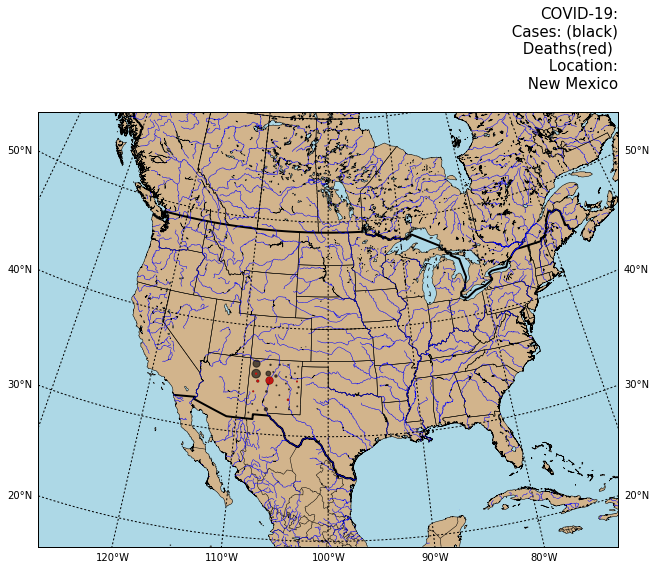

In [6]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon
import numpy as np
from PIL import Image,ImageFont,ImageDraw,ImageFilter,ImageChops
from random import randint
from mpl_toolkits.basemap import Basemap
fig = plt.figure(num=None, figsize=(12, 8) ) 
m = Basemap(width=6000000,height=4500000,resolution='h',projection='aea',lat_1=35.,lat_2=45,lon_0=-100,lat_0=40)
m.drawcoastlines(linewidth=0.5)
m.fillcontinents(color='tan',lake_color='lightblue')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,10.),labels=[True,True,False,False],dashes=[2,2])
m.drawmeridians(np.arange(-180.,181.,10.),labels=[False,False,False,True],dashes=[2,2])
m.drawmapboundary(fill_color='lightblue')
m.drawcountries(linewidth=2, linestyle='solid', color='k' ) 
m.drawstates(linewidth=0.5, linestyle='solid', color='k')
m.drawrivers(linewidth=0.5, linestyle='solid', color='blue')
def RndState():
    TX=["Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware", "Florida", "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana", "Maine", "Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada", "New Hampshire", "New Jersey", "New Mexico", "New York", "North Carolina", "North Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Vermont", "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming"]
    x=randint(1,49)
    return TX[x]

search = RndState()
LASTFILE="COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/05-08-2020.csv"
#LASTFILE="csse_covid_19_data/csse_covid_19_daily_reports/03-30-2020.csv"
DataIn = open(LASTFILE).readlines()
LAT=[]
LONG=[]
LATd=[]
LONGd=[]
STATES=[]
cases=[]
deaths =[]
longitude = ""
search = RndState()
for line in DataIn:
    line=line.replace("\n","")
    line = line.lstrip(",")
    line = line.split(",")
    if search in line[2] and "-" in (line[6]):
        text=line[2],line[1],line[3],line[4],line[5],line[6],line[7],line[8],line[9],line[10]
        STATES.append(text)
        LAT.append(line[5])
        LONG.append(line[6])
        if int(line[8])>0:
            LATd.append(line[5])
            LONGd.append(line[6])        
        cases.append(line[7])
        deaths.append(line[8])
        longitude = longitude+line[6]+","
print(len(STATES))        
LT = np.array(LAT,dtype=np.float)
LG = np.array(LONG,dtype=np.float)
LTd = np.array(LATd,dtype=np.float)
LGd = np.array(LONGd,dtype=np.float)

S=1
Size=[]
for x in cases:
    S=1+(float(x)*.05)
    Size.append(int(S))
    #print(int(S))
s = np.array(Size)

Sd=0
Sized=[]
for xd in deaths:
    Sd=0+(float(xd)+.05)
    Sized.append(int(Sd))
    #print(int(S))
sd = np.array(Sized)
#print(Sized)
plt.title("COVID-19:\n Cases: (black)\n Deaths(red) \n Location:\n "+search+"\n", fontsize=15, loc='right')
#plt.text(max(LG-1.2),max(LT), search, color='white', fontsize=24)
#x, y = m(lons, lats)  # transform coordinates
x, y = m(LGd, LTd)
xx,yy = m(LG, LT)
plt.xlabel('Longitude',color="white", fontsize=24)
plt.ylabel('Latitute',color="white", fontsize=24)

m.scatter(xx, yy, s=s, color='black', zorder=5, alpha=0.6)
m.scatter(x, y, s=sd, color='r', zorder=10,  alpha=0.6)

plt.savefig("BaseMap/"+search+"Hotspots1__.png", dpi=120, facecolor='salmon', edgecolor='b',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches="tight", pad_inches=0.2,
        frameon=None, metadata=None)


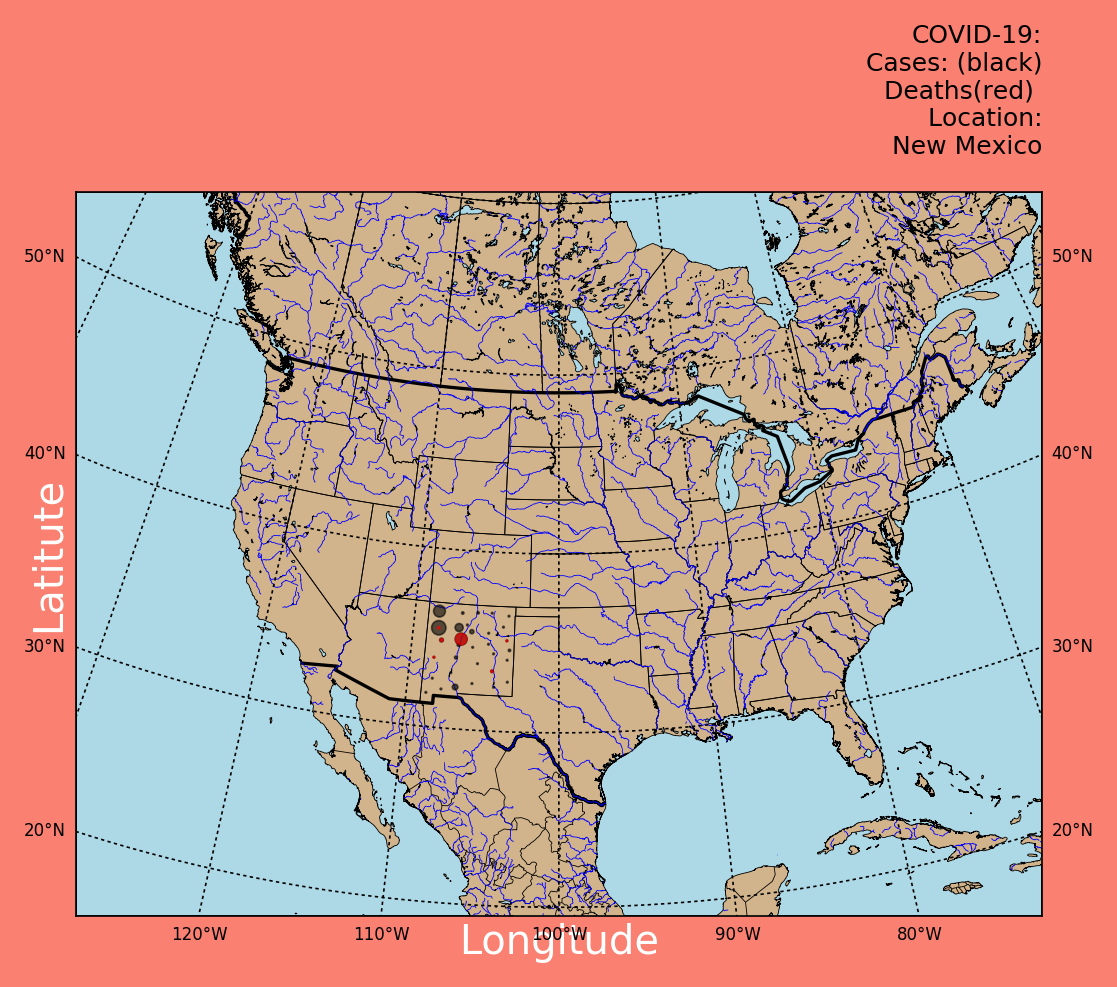

In [7]:
from PIL import Image
IM = Image.open("BaseMap/"+search+"Hotspots1__.png")
IM

In [101]:
import requests as req

#URL ="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
URL ="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv"


print (URL[-33:])
STAT =URL[57:-4]
resp = req.get(URL)

#LASTFILE="COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
#STAT =LASTFILE[57:-4]
#DataIn = open(LASTFILE).readlines()

content = resp.text

TEMP = open(URL[-33:],"w")
TEMP.write(content)
TEMP.close()


time_series_covid19_deaths_US.csv


In [126]:

LASTFILE="time_series_covid19_deaths_US.csv"
DataIn = open(LASTFILE).readlines()
cnt=0
CNT=0
ALL=[]
yesterday=0
today=0
Dcnt=0
for line in DataIn:
    if cnt==0:print (line)
    cnt=cnt+1
    line=line.replace("\n","")
    line = line.lstrip(",")
    line = line.split(",")
    #if cnt<10 and line[5] !="":print (line[6])
    if "US" == line[7]:
        #if CNT<5 and line[5] !="":print line
        CNT=CNT+1
        if int(line[-1])>0:
            if int(line[-2])+20<int(line[-1]) and "-" in line[9]:
                ALL.append(line)
                #if CNT<20:print(text)
                LAT.append(line[5])
                LONG.append(line[6])                
                STATES.append(text)
                text=line[5],line[6],line[8],line[9]
                #prints all lines with increases
                #print (text,line[-2],line[-1] )
                yesterday=yesterday+int(line[-2])
                today= today+int(line[-1])
                Dcnt=Dcnt+1
                LATd.append(text)
                LONGd.append(text)
print(len(ALL))
for line in ALL:
    data = list(map(int,line[14:] ))
    print(line[5],line[6],float(line[9]),float(line[8]),data)

UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18

In [ ]:
#LASTFILE0="COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/time_series_covid19_confirmed_US.csv"
#LASTFILE="COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv"
DataIn = open(LASTFILE).readlines()
LAT=[]
LONG=[]
LATd=[]
LONGd=[]
STATES=[]
ALL=[]
cases=[]
deaths =[]
yesterday=0
today=0
longitude = ""
cnt=0
CNT=0
Dcnt=0
for line in DataIn:
    line=line.replace('"','')
    if cnt==0:print (line)
    cnt=cnt+1
    line=line.replace("\n","")
    line = line.lstrip(",")
    line = line.split(",")
    #if cnt<10 and line[5] !="":print (line[6])
    if "US" == line[7]:
        #if CNT<5 and line[5] !="":print line
        CNT=CNT+1
        ALL.append(line)
        text=line[5],line[6],line[8],line[9]
        if CNT<20:print(text)
        STATES.append(text)
        LAT.append(line[5])
        LONG.append(line[6])
        if int(line[-1])>0:
            if line[-2]<line[-1]:
                #prints all lines with increases
                #print (text,line[-2],line[-1] )
                yesterday=yesterday+int(line[-2])
                today= today+int(line[-1])
                Dcnt=Dcnt+1
                LATd.append(text)
                LONGd.append(text)
print(len(STATES))

In [ ]:
cnt=0
data=open("STATE.data","w")
data.write("City,State,Latitude,Longitude\n")
for line in STATES:
    cnt=cnt+1
    line =str(line)
    line=line.replace("(","")
    line=line.replace(")","")
    line=line.replace(")","")
    line=line.replace(")","")
    data.write(line+"\n")
data.close    

In [6]:
#LASTFILE0="COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/time_series_covid19_confirmed_US.csv"
#LASTFILE="COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv"
DataIn = open(LASTFILE).readlines()
LAT=[]
LONG=[]
LATd=[]
LONGd=[]
STATES=[]
ALL=[]
cases=[]
deaths =[]
yesterday=0
today=0
longitude = ""
cnt=0
CNT=0
Dcnt=0
for line in DataIn:
    line=line.replace('"','')
    #if cnt==0:print (line)
    cnt=cnt+1
    line=line.replace("\n","")
    line = line.lstrip(",")
    line = line.split(",")
    #if cnt<10 and line[5] !="":print (line[6])
    if "US" == line[7]:# and line[6] == "New York":
        #if CNT<5 and line[5] !="":print line
        CNT=CNT+1
        ALL.append(line)
        text=line[5],line[6],line[8],line[9]
        #print(text)
        STATES.append(text)
        LAT.append(line[5])
        LONG.append(line[6])
        L=len(line)
        #print(L)
        #print(line[L-1],line[L-2])
        if int(line[L-2])+10<int(line[L-1]):
            print ("if ",int(line[L-2]),'+10',int(line[L-1]))
            print (text,int(line[L-2]),int(line[L-1]))
            yesterday=yesterday+int(line[-2])
            today= today+int(line[-1])
            Dcnt=Dcnt+1
            LATd.append(text)
            LONGd.append(text)
print ('------------')
print ('Counties',CNT) 
print ('Counties with new deaths',Dcnt)
print (len(LONGd))
print (Dcnt)
print ("yesterday",yesterday)
print ("today",today)
print ("today-yesterday",today-yesterday)

------------
Counties 0
Counties with new deaths 0
0
0
yesterday 0
today 0
today-yesterday 0


['84001005.0', 'US', 'USA', '840', '1005.0', 'Barbour', 'Alabama', 'US', '31.868263', '-85.3871286', 'Barbour', ' Alabama', ' US', '24686', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0']
['84001007.0', 'US', 'USA', '840', '1007.0', 'Bibb', 'Alabama', 'US', '32.99642064', '-87.12511459999996', 'Bibb', ' Alabama', ' US', '22394', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0

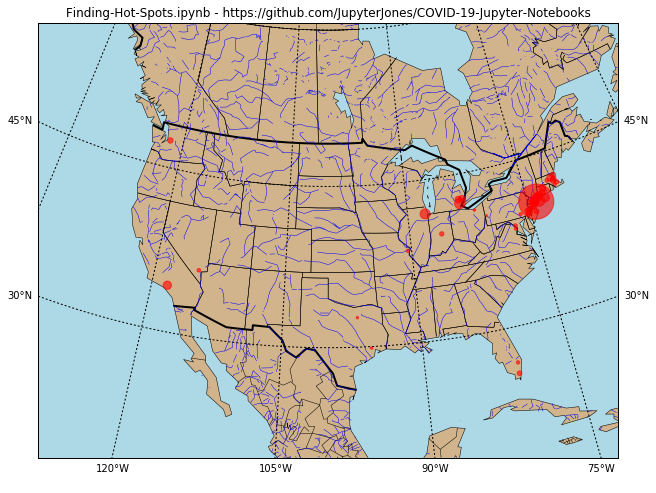

In [20]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon
import numpy as np
from PIL import Image,ImageFont,ImageDraw,ImageFilter,ImageChops
from random import randint
from mpl_toolkits.basemap import Basemap
fig = plt.figure(num=None, figsize=(12, 8) ) 
m = Basemap(width=6000000,height=4500000,resolution='c',projection='aea',lat_1=35.,lat_2=45,lon_0=-100,lat_0=40)
m.drawcoastlines(linewidth=0.5)
m.fillcontinents(color='tan',lake_color='lightblue')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,15.),labels=[True,True,False,False],dashes=[2,2])
m.drawmeridians(np.arange(-180.,181.,15.),labels=[False,False,False,True],dashes=[2,2])
m.drawmapboundary(fill_color='lightblue')
m.drawcountries(linewidth=2, linestyle='solid', color='k' ) 
m.drawstates(linewidth=0.5, linestyle='solid', color='k')
m.drawrivers(linewidth=0.5, linestyle='solid', color='blue')


cities =[]
LAT=[]
LONG=[]
LATd=[]
LONGd=[]
STATES=[]
ALL=[]
cases=[]
deaths =[]
yesterday=0
today=0
longitude = ""
cnt=0
CNT=0
Dcnt=0
LASTFILE="ies_covid19_deaths_US.csv"
DataIn = open(LASTFILE).readlines()
for line in DataIn:
    line=line.replace('"','')
    #if cnt==0:print (line)
    cnt=cnt+1
    line=line.replace("\n","")
    line = line.lstrip(",")
    line = line.split(",")
    #if cnt<10 and line[5] !="":print (line[6])
    if "US" == line[7]:# and line[6] == "New York":
        if CNT==7:print(line)
        if CNT==8:print(line)    
        #if CNT<5 and line[5] !="":print line
        CNT=CNT+1
        ALL.append(line)
        STATES.append(text)
        LAT.append(line[5])
        LONG.append(line[6])
        L=len(line)
        #print(L)
        #print(line[L-1],line[L-2])
        if int(line[L-2])+10<int(line[L-1]):
            #print ("if ",int(line[L-2]),'+10',int(line[L-1]))
            #print (text,int(line[L-2]),int(line[L-1]))
            yesterday=yesterday+int(line[-2])
            today= today+int(line[-1])
            Dcnt=Dcnt+1
            if len(line[8])>3:
                #print(line[8],line[9])
                cities.append([line[5],line[6],line[8],line[9],int(line[L-1])])
                LATd.append(line[8])
                LONGd.append(line[9])
                deaths.append(int(line[L-1]))
LTd = np.array(LATd,dtype=np.float)
LGd = np.array(LONGd,dtype=np.float)
Str = np.array(cities,dtype=np.str)

S=1
Size=[]
for x in cases:
    S=1+(float(x)*.01)
    Size.append(int(S))
    #print(int(S))
s = np.array(Size)

Sd=1
Sized=[]
for xd in deaths:
    Sd=0+(float(xd)*.07)
    Sized.append(int(Sd))
    #print(int(S))
sd = np.array(Sized)
#print(Sized)
plt.title("Finding-Hot-Spots.ipynb - https://github.com/JupyterJones/COVID-19-Jupyter-Notebooks")
#plt.text(max(LG-1.2),max(LT), search, color='white', fontsize=24)
#x, y = m(lons, lats)  # transform coordinates
x, y = m(LGd, LTd)
#xx,yy = m(LG, LT)
plt.xlabel('Longitude',color="white", fontsize=24)
plt.ylabel('Latitute',color="white", fontsize=24)

#m.scatter(xx, yy, s=s, color='black', zorder=5, alpha=0.6)
m.scatter(x, y, s=sd, color='r', zorder=10,  alpha=0.6)
filename = "BaseMap/april30_Hotspots__.png"
plt.savefig(filename, dpi=120, facecolor='salmon', edgecolor='b',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches="tight", pad_inches=0.2,
        frameon=None, metadata=None)


In [26]:
for i in (range(0,len(cities))):
    print(cities[i][0])
    print(cities[i][1])
    print(cities[i][2])
    print(cities[i][3])
    print("-----------")

Los Angeles
California
34.30828379
-118.22824109999999
-----------
Fairfield
Connecticut
41.26809896
-73.3881171
-----------
Hartford
Connecticut
41.80283011
-72.73103891
-----------
New Haven
Connecticut
41.408032500000004
-72.93620426
-----------
Miami-Dade
Florida
25.6112362
-80.55170587
-----------
Palm Beach
Florida
26.64676272
-80.46536002
-----------
Cook
Illinois
41.84144849
-87.81658794
-----------
Marion
Indiana
39.78163624
-86.13826325
-----------
Montgomery
Maryland
39.13676329
-77.20358245
-----------
Bristol
Massachusetts
41.79228404
-71.10872211
-----------
Essex
Massachusetts
42.6687626
-70.94687179
-----------
Middlesex
Massachusetts
42.48607732
-71.39049229
-----------
Norfolk
Massachusetts
42.16073095
-71.20530408
-----------
Plymouth
Massachusetts
41.94070556
-70.80802823
-----------
Suffolk
Massachusetts
42.327951399999996
-71.07850442
-----------
Worcester
Massachusetts
42.35026951
-71.90493363
-----------
Macomb
Michigan
42.69158356
-82.92752801
-----------
Oakla

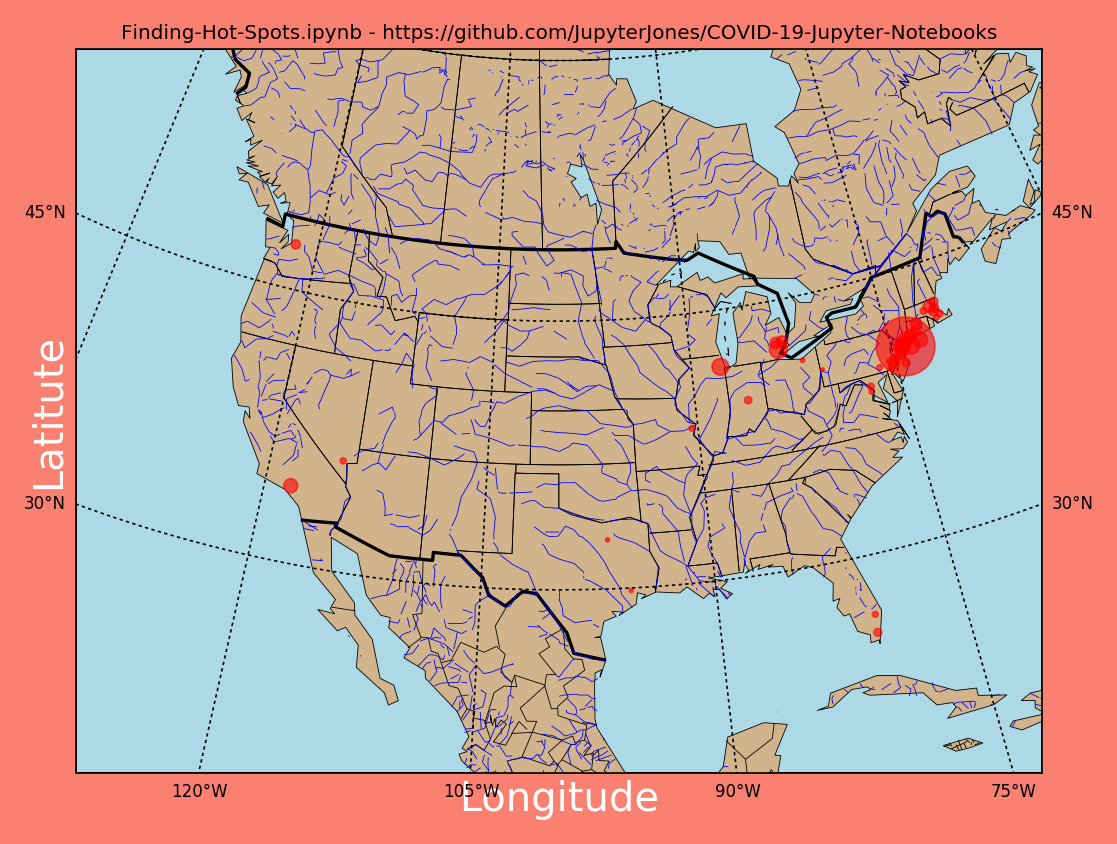

In [11]:
from PIL import Image
IM = Image.open("BaseMap/april30_Hotspots__.png")
IM

In [12]:
print(cities)

[]


In [10]:
LASTFILE="ies_covid19_deaths_US.csv"
DataIn = open(LASTFILE).readlines()
for line in DataIn:
    line=line.replace('"','')
    if cnt==0:print (line)
    cnt=cnt+1
    line=line.replace("\n","")
    line = line.lstrip(",")
    line = line.split(",")
    #if cnt<10 and line[5] !="":print (line[6])
    if "US" == line[7]:# and line[6] == "New York":
        #if CNT<5 and line[5] !="":print line
        CNT=CNT+1
        ALL.append(line)
        STATES.append(text)
        LAT.append(line[5])
        LONG.append(line[6])
        L=len(line)
        #print(L)
        #print(line[L-1],line[L-2])
        if int(line[L-2])+10<int(line[L-1]):
            #print ("if ",int(line[L-2]),'+10',int(line[L-1]))
            #print (text,int(line[L-2]),int(line[L-1]))
            yesterday=yesterday+int(line[-2])
            today= today+int(line[-1])
            Dcnt=Dcnt+1
            if len(line[8])>3:
                print(line[8],line[9],line[8],line[9])
                LATd.append(line[8])
                LONGd.append(line[9])
            

34.30828379 -118.22824109999999
41.26809896 -73.3881171
41.80283011 -72.73103891
41.408032500000004 -72.93620426
25.6112362 -80.55170587
26.64676272 -80.46536002
41.84144849 -87.81658794
39.78163624 -86.13826325
39.13676329 -77.20358245
41.79228404 -71.10872211
42.6687626 -70.94687179
42.48607732 -71.39049229
42.16073095 -71.20530408
41.94070556 -70.80802823
42.327951399999996 -71.07850442
42.35026951 -71.90493363
42.69158356 -82.92752801
42.66090111 -83.38595416
42.28098405 -83.281255
38.63770039999999 -90.4458375
36.21458855 -115.0130241
40.96010917 -74.07164325
40.78681335 -74.24657979
40.73766234 -74.07515667
40.28047017 -74.70479631
40.43629879 -74.41426991
40.86095313 -74.54553709999998
39.8895449 -74.28089251
41.03238628 -74.29954144
40.56465737 -74.61683016
40.65835409 -74.30680092
40.74066522 -73.58941873
40.76727260000001 -73.97152637
40.88320119 -72.8012172
41.16278376 -73.75741653
41.424119 -81.65918339
40.6825484 -80.34921611
40.33682119 -75.10836643
39.91680171 -75.402436

39
drawing image from arcGIS server... ...finished


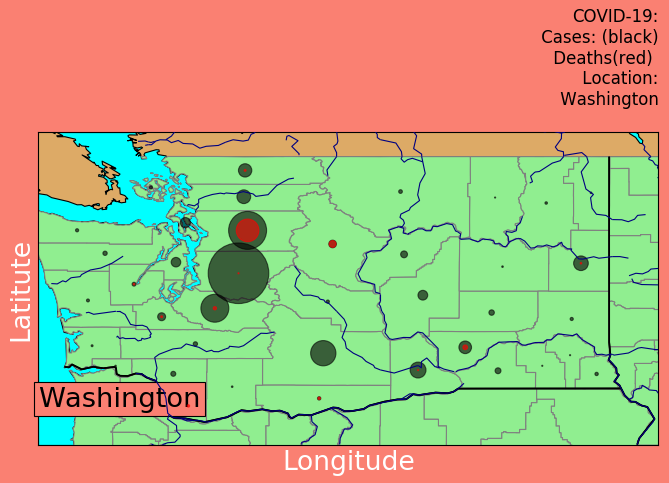

In [30]:
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon
import numpy as np
from PIL import Image,ImageFont,ImageDraw,ImageFilter,ImageChops
from random import randint
from mpl_toolkits.basemap import Basemap
#prevents a warning from using Python3 instaead of Python2
import warnings
warnings.filterwarnings("ignore")
import sys
sys.path.insert(1, "/home/jack/hidden")
import Key
import twython
from twython import Twython
# Make the figure
#fig = plt.figure()
#ax = fig.add_subplot(111)

# Easiest way to make a basemap is to use the cylidrical projection and 
# define the bottom left lat/lon and top right lat/lon corners

def RndState():
    TX=["Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware", "Florida", "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana", "Maine", "Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada", "New Hampshire", "New Jersey", "New Mexico", "New York", "North Carolina", "North Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Vermont", "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming"]
    x=randint(1,50)
    return TX[x]
LASTFILE="COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/04-27-2020.csv"
#LASTFILE="csse_covid_19_data/csse_covid_19_daily_reports/03-30-2020.csv"
DataIn = open(LASTFILE).readlines()
LAT=[]
LONG=[]
LATd=[]
LONGd=[]
STATES=[]
cases=[]
deaths =[]
longitude = ""
search = RndState()
for line in DataIn:
    line=line.replace("\n","")
    line = line.lstrip(",")
    line = line.split(",")
    if search in line[2] and "-" in (line[6]):
        text=line[2],line[1],line[3],line[4],line[5],line[6],line[7],line[8],line[9],line[10]
        STATES.append(text)
        LAT.append(line[5])
        LONG.append(line[6])
        if int(line[8])>0:
            LATd.append(line[5])
            LONGd.append(line[6])        
        cases.append(line[7])
        deaths.append(line[8])
        longitude = longitude+line[6]+","
print(len(STATES))        
LT = np.array(LAT,dtype=np.float)
LG = np.array(LONG,dtype=np.float)
LTd = np.array(LATd,dtype=np.float)
LGd = np.array(LONGd,dtype=np.float)


fig = plt.figure(num=None, figsize=(10,8), dpi=80, facecolor='salmon')


urcrnrlat=max(LT)+.5
llcrnrlat=min(LT)-.5
urcrnrlon=max(LG)+.8
llcrnrlon=min(LG)-.5
lat_0 = (urcrnrlat+llcrnrlat)/2
lon_0 =(urcrnrlon+llcrnrlon)/2

# create the map object, m
m = Basemap(resolution='i', projection='cyl', \
    llcrnrlon=llcrnrlon, llcrnrlat=llcrnrlat, urcrnrlon=urcrnrlon, urcrnrlat=urcrnrlat)

# Note: You can define the resolution of the map you just created. Higher 
# resolutions take longer to create.
#    'c' - crude
#    'l' - low
#    'i' - intermediate
#    'h' - high
#    'f' - full

# Draw some map elements on the map
m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='#ddaa66',lake_color='aqua')
m.drawcoastlines()
m.drawrivers(linewidth=1.0,color='navy',zorder=8)
m.drawcounties(linewidth=1.0, linestyle='solid', color='gray', antialiased=1, facecolor='lightgreen', ax=None, zorder=2, drawbounds=True)
m.drawstates(linewidth=1.5, linestyle='solid', color='black', antialiased=1,zorder=2, )
plt.text(llcrnrlon,llcrnrlat+.5, search, color='black', fontsize=24.5, zorder=6,bbox=dict(facecolor='salmon'))

# Drawing ArcGIS Basemap (only works with cylc projections??)
# Examples of what each map looks like can be found here:
# http://kbkb-wx-python.blogspot.com/2016/04/python-basemap-background-image-from.html
maps = ['ESRI_Imagery_World_2D',    # 0
        'ESRI_StreetMap_World_2D',  # 1
        'NatGeo_World_Map',         # 2
        'NGS_Topo_US_2D',           # 3
        'Ocean_Basemap',            # 4
        'USA_Topo_Maps',            # 5
        'World_Imagery',            # 6
        'World_Physical_Map',       # 7
        'World_Shaded_Relief',      # 8
        'World_Street_Map',         # 9
        'World_Terrain_Base',       # 10
        'World_Topo_Map'            # 11
        ]
print ("drawing image from arcGIS server..."),
m.arcgisimage(service=maps[8], xpixels=1000, verbose=False)
print ("...finished")

S=1
Size=[]
for x in cases:
    S=1+(float(x)*.5)
    Size.append(int(S))
    #print(int(S))
s = np.array(Size)

Sd=0
Sized=[]
for xd in deaths:
    Sd=0+(float(xd))
    Sized.append(int(Sd))
    #print(int(S))
sd = np.array(Sized)
#print(Sized)
plt.title("COVID-19:\n Cases: (black)\n Deaths(red) \n Location:\n "+search+"\n", fontsize=15, loc='right')
#plt.text(max(LG-1.2),max(LT), search, color='white', fontsize=24)
#x, y = m(lons, lats)  # transform coordinates
x, y = m(LGd, LTd)
xx,yy = m(LG, LT)
plt.xlabel('Longitude',color="white", fontsize=24)
plt.ylabel('Latitute',color="white", fontsize=24)

m.scatter(xx, yy, s=s, color='black', zorder=5, alpha=0.6)
m.scatter(x, y, s=sd, color='r', zorder=10,  alpha=0.6)



#plt.scatter(x, y,  s=s, color="black", zorder=3, alpha=0.6)
#plt.scatter(x, y,  s=sd, color="red", zorder=6, alpha=0.6)
#plt.text(urcrnrlon,urcrnrlat, search, color='white', fontsize=24)
plt.savefig("BaseMap/"+search+"arcGIS__.png", dpi=120, facecolor='salmon', edgecolor='b',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches="tight", pad_inches=0.2,
        frameon=None, metadata=None)


# Add plot title and other plot elements the normal way
filename0 = "BaseMap/april29_Hotspots__.png"


def draw_blurred_back(img, position, text, font, col, halo_col):
    halo = Image.new('RGBA', img.size, (0, 0, 0, 0))
    ImageDraw.Draw(halo).text(position, text, font = font, fill = halo_col)
    blurred_halo = halo.filter(ImageFilter.BLUR)
    ImageDraw.Draw(blurred_halo).text(position, text, font = font, fill = col)
    return Image.composite(img, blurred_halo, ImageChops.invert(blurred_halo))

if __name__ == '__main__':
    
    basewidth = 720
    inp = Image.open(filename0)
    wpercent = (basewidth / float(inp.size[0]))
    hsize = int((float(inp.size[1]) * float(wpercent)))
    inp = inp.resize((basewidth, hsize), Image.ANTIALIAS)
    #img.save(resized_image.jpg')
    
    #inp = inp.resize((640,640), Image.ANTIALIAS)
    font = ImageFont.truetype("/home/jack/fonts/Exo-Black.ttf", 30)
    text_title = (255, 255,230) # bright green
    blur_title = (0, 0, 0)   # black

    i2 = draw_blurred_back(inp, (65, 60), "Plotting COVID-19 Data", font, text_title, blur_title)
    font0 = ImageFont.truetype("/home/jack/fonts/Exo-Black.ttf", 20)
    font1 = ImageFont.truetype("/home/jack/fonts/Exo-Black.ttf", 14)
    font2 = ImageFont.truetype("/home/jack/fonts/PatrickHand-Regular.ttf", 16)
    i2 = draw_blurred_back(i2, (65, 95), "Finding-Hot-Spots.ipynb", font0, text_title, blur_title)
    TXT="https://github.com/JupyterJones/COVID-19-Jupyter-Notebooks"
    draw = ImageDraw.Draw(i2) 
    draw.text((65, 45), TXT, font = font2, align ="left",fill="black")
    #i2 = draw(i2, (15, 65),TXT, font1)    
    
    #txt = Image.new('RGBA', i.size, (255,255,255,0))

    # get a font
    fnt = ImageFont.truetype("/home/jack/fonts/Exo-Black.ttf", 20)
    # get a drawing context
    signature_ = "@jacklnorthrup" 
    #get length in pixel of signature_
    sizeS,ln = fnt.getsize(signature_)
    #add 15 pixels to right border
    pt = sizeS+25
    width, height = inp.size
    #marginx starting point of signature_
    marginx = pt
    #bottom margin
    marginy = 30
    x = width - marginx
    y = height - marginy
    

    text_sig = (255, 255,230) # bright green
    blur_sig = (0, 0, 0)   # black
    txt=draw_blurred_back(i2,(x,y), signature_, fnt, text_sig, blur_sig)
    out = Image.alpha_composite(i2, txt)
    out.save("images/TEMP_POST.png")

CONSUMER_KEY = Key.twiter()[0]
CONSUMER_SECRET = Key.twiter()[1]
ACCESS_KEY = Key.twiter()[2]
ACCESS_SECRET = Key.twiter()[3]
twitter = Twython(CONSUMER_KEY, CONSUMER_SECRET, ACCESS_KEY, ACCESS_SECRET)

STR = "Finding-Hot-Spots.ipynb https://github.com/JupyterJones/COVID-19-Jupyter-Notebooks" 

PATH = "images/TEMP_POST.png"
#PATH="BaseMap/april29_Hotspots__.png"
photo = open(PATH,'rb')
#response = twitter.upload_media(media=photo)
#twitter.update_status(status=STR, media_ids=[response['media_id']])

(720, 544)


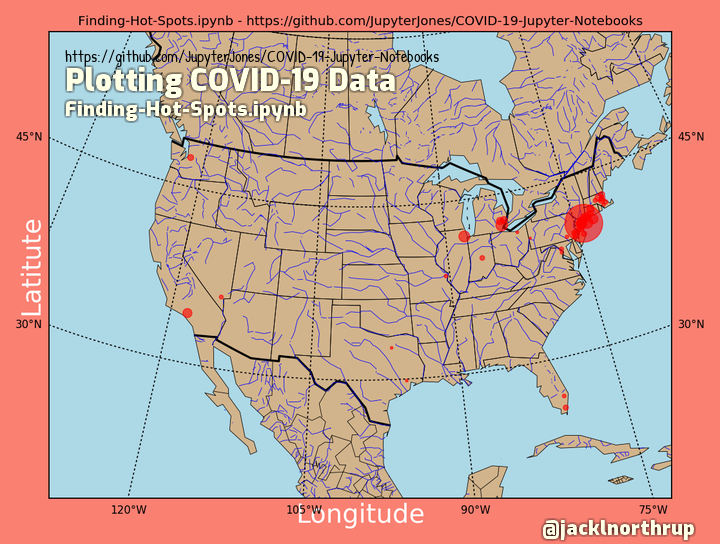

In [32]:
from PIL import Image
IM = Image.open(PATH)
print(IM.size)
IM

In [32]:
from GlobalData import *
print(GlobalData("help"))

None


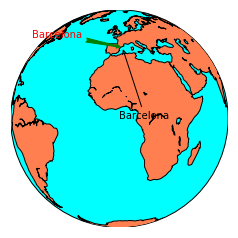

In [49]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt


map = Basemap(projection='ortho', 
              lat_0=0, lon_0=0)

map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='coral',lake_color='aqua')
map.drawcoastlines()


x, y = map(2, 41)
x2, y2 = (-90, 10)

plt.annotate('Barcelona', xy=(x, y),  xycoords='data',
                xytext=(x2, y2), textcoords='offset points',
                color='r',
                arrowprops=dict(arrowstyle="fancy", color='g')
                )

x2, y2 = map(0, 0)
plt.annotate('Barcelona', xy=(x, y),  xycoords='data',
                xytext=(x2, y2), textcoords='data',
                arrowprops=dict(arrowstyle="->")
                )
plt.show()


In [63]:
!ls COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/05*

COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/05-01-2020.csv
COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/05-02-2020.csv
COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/05-03-2020.csv
COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/05-04-2020.csv
COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/05-05-2020.csv
COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/05-06-2020.csv
COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/05-07-2020.csv
COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/05-08-2020.csv
COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/05-09-2020.csv
COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/05-10-2020.csv
COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/05-11-2020.csv
COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/05-12-2020.csv
COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/05-13-2020.csv
COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/05-14-2020.csv
COVID-

159


NameError: name 'HighestCounts' is not defined

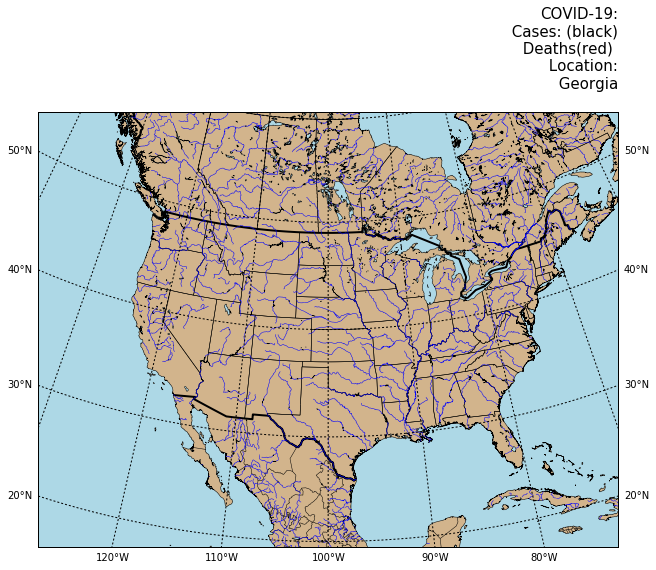

In [71]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon
import numpy as np
from PIL import Image,ImageFont,ImageDraw,ImageFilter,ImageChops
from random import randint
from mpl_toolkits.basemap import Basemap
fig = plt.figure(num=None, figsize=(12, 8) ) 
m = Basemap(width=6000000,height=4500000,resolution='h',projection='aea',lat_1=35.,lat_2=45,lon_0=-100,lat_0=40)
m.drawcoastlines(linewidth=0.5)
m.fillcontinents(color='tan',lake_color='lightblue')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,10.),labels=[True,True,False,False],dashes=[2,2])
m.drawmeridians(np.arange(-180.,181.,10.),labels=[False,False,False,True],dashes=[2,2])
m.drawmapboundary(fill_color='lightblue')
m.drawcountries(linewidth=2, linestyle='solid', color='k' ) 
m.drawstates(linewidth=0.5, linestyle='solid', color='k')
m.drawrivers(linewidth=0.5, linestyle='solid', color='blue')
def RndState():
    TX=["Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware", "Florida", "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana", "Maine", "Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada", "New Hampshire", "New Jersey", "New Mexico", "New York", "North Carolina", "North Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Vermont", "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming"]
    x=randint(1,49)
    return TX[x]

search = RndState()
LASTFILE="COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/05-18-2020.csv"
#LASTFILE="csse_covid_19_data/csse_covid_19_daily_reports/03-30-2020.csv"
DataIn = open(LASTFILE).readlines()
LAT=[]
LONG=[]
LATd=[]
LONGd=[]
STATES=[]
cases=[]
deaths =[]
longitude = ""
search = RndState()
for line in DataIn:
    line=line.replace("\n","")
    line = line.lstrip(",")
    line = line.split(",")
    if search in line[2] and "-" in (line[6]):
        text=line[2],line[1],line[3],line[4],line[5],line[6],line[7],line[8],line[9],line[10]
        STATES.append(text)
        LAT.append(line[5])
        LONG.append(line[6])
        if int(line[8])>0:
            LATd.append(line[5])
            LONGd.append(line[6])        
        cases.append(line[7])
        deaths.append(line[8])
        longitude = longitude+line[6]+","
print(len(STATES))        
LT = np.array(LAT,dtype=np.float)
LG = np.array(LONG,dtype=np.float)
LTd = np.array(LATd,dtype=np.float)
LGd = np.array(LONGd,dtype=np.float)

S=1
Size=[]
for x in cases:
    S=1+(float(x)*.05)
    Size.append(int(S))
    #print(int(S))
s = np.array(Size)

Sd=0
Sized=[]
for xd in deaths:
    Sd=0+(float(xd)+.05)
    Sized.append(int(Sd))
    #print(int(S))
sd = np.array(Sized)
#print(Sized)
plt.title("COVID-19:\n Cases: (black)\n Deaths(red) \n Location:\n "+search+"\n", fontsize=15, loc='right')
#plt.text(max(LG-1.2),max(LT), search, color='white', fontsize=24)
#x, y = m(lons, lats)  # transform coordinates
longitude = HighestCounts[i][3]
latitude = HighestCounts[i][4]


#x, y = m(longitude,latitude)
x,y = m(LG, LT)
plt.xlabel('Longitude',color="white", fontsize=24)
plt.ylabel('Latitute',color="white", fontsize=24)

#m.scatter(xx, yy, s=s, color='black', zorder=5, alpha=0.6)
m.scatter(x, y, s=20, color='r', zorder=10,  alpha=0.6)

plt.savefig("BaseMap/"+search+"Hotspots1__.png", dpi=120, facecolor='salmon', edgecolor='b',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches="tight", pad_inches=0.2,
        frameon=None, metadata=None)


In [80]:
import requests as req
import time
DATE = time.strftime("%m-%d-%H_")

# Create an empty list
ALLdata=[]

URL ="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv"

resp = req.get(URL)
content = resp.text

#clean the content, then break the content into lines 
content=content.replace(",,",",Ex,")
content=content.replace("(","")
content=content.replace(")","")
content=content.replace("\"","")
lines= content.splitlines()
print (len(lines))
# loop the lines one line at a time
# split each line at the delimiter ` , ` 
# then append the empty list 'ALLdata' with the line (which is now a list):  [line]  
for line in lines:
    #convert the splitlines to strings
    line= str(line).split(",")
    ALLdata.append(line)

3262


In [97]:
Threshhold = 2
count = 0
cnt=0
TOTALS =[]
LAT=[]
LONG=[]
# Check each line of data, county by county.
print("The following counties have had an increase in deaths of at least "+str(Threshhold)+" every day for the last four days.\n")
for i in range(1,len(ALLdata)):
    
    # Increase a counter for every line -  this will allow further investigation into the data
    # as demonstarted in the next four cells.
    count=count+1
    if count==1:print(ALLdata[i])
    # subtract the last four days of data to see if it has increased by the minimum of the Threshhold each day

    if int(ALLdata[i][-4])-int(ALLdata[i][-5]) >Threshhold and int(ALLdata[i][-3])-int(ALLdata[i][-4]) >Threshhold and int(ALLdata[i][-2])-int(ALLdata[i][-3]) >Threshhold and int(ALLdata[i][-1])-int(ALLdata[i][-2]) >Threshhold  and "-" in ALLdata[i][9]:
        cnt=cnt+1
        # if they do increase as specified, define the line as a variable called history
        history=[int(ALLdata[i][-4])-int(ALLdata[i][-5]),int(ALLdata[i][-3])-int(ALLdata[i][-4]),int(ALLdata[i][-2])-int(ALLdata[i][-3]),int(ALLdata[i][-1])-int(ALLdata[i][-2])]
        total=int(ALLdata[i][-4])-int(ALLdata[i][-5])+int(ALLdata[i][-3])-int(ALLdata[i][-4])+int(ALLdata[i][-2])-int(ALLdata[i][-3])+int(ALLdata[i][-1])-int(ALLdata[i][-2])
        # The total amount of deaths in the specific county
        deaths = int(ALLdata[i][-1])
        # The county's name
        county = ALLdata[i][5]
        # The State the county is located in
        state = ALLdata[i][6]
        # The longitude and latitude of the county
        Longitude = float(ALLdata[i][9])
        LONG.append(Longitude)        
        Latitude = float(ALLdata[i][8])
        LAT.append(Latitude)
        TOTALS.append(total)
        #print the data line by line
        print (cnt,"i="+str(count),deaths,county,state,Longitude,Latitude,total, history)
        
LT = np.array(LAT,dtype=np.float)
LG = np.array(LONG,dtype=np.float)
x = np.array(range(0,len(LT)))

#print(len(LT))
#print(len(LG))
print(LT,"\n",LG)
Sd=0
Sized=[]
for xd in TOTALS:
    Sd=0+(float(xd)*.2)
    Sized.append(int(Sd))
    #print(int(S))
sd = np.array(Sized)
print(sd)

The following counties have had an increase in deaths of at least 2 every day for the last four days.

['16', 'AS', 'ASM', '16', '60.0', 'Ex', 'American Samoa', 'US', '-14.270999999999999', '-170.132', 'American Samoa', ' US', '55641', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0']
1 i=210 1840 Los Angeles California -118.22824109999999 34.30828379 129 [42, 40, 28, 19]
2 i=266 272 Denver Colorado -104.87256950000001 39.76018276 35 [11, 13, 4, 7]
3 i=314

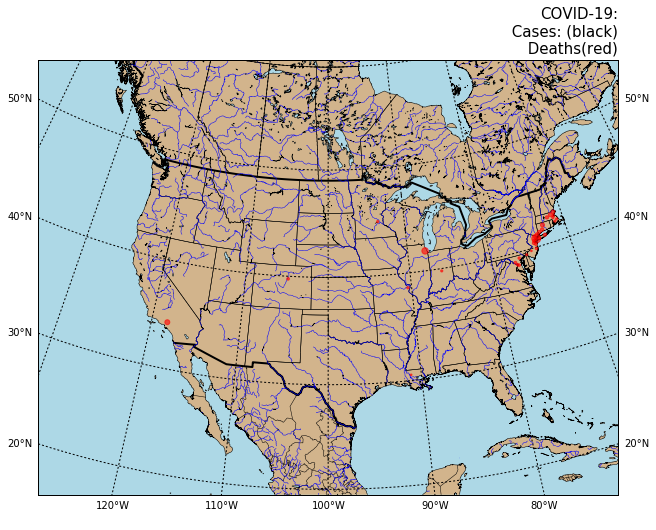

In [99]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon
import numpy as np
from PIL import Image,ImageFont,ImageDraw,ImageFilter,ImageChops
from random import randint
from mpl_toolkits.basemap import Basemap
fig = plt.figure(num=None, figsize=(12, 8) ) 
m = Basemap(width=6000000,height=4500000,resolution='h',projection='aea',lat_1=35.,lat_2=45,lon_0=-100,lat_0=40)
m.drawcoastlines(linewidth=0.5)
m.fillcontinents(color='tan',lake_color='lightblue')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,10.),labels=[True,True,False,False],dashes=[2,2])
m.drawmeridians(np.arange(-180.,181.,10.),labels=[False,False,False,True],dashes=[2,2])
m.drawmapboundary(fill_color='lightblue')
m.drawcountries(linewidth=2, linestyle='solid', color='k' ) 
m.drawstates(linewidth=0.5, linestyle='solid', color='k')
m.drawrivers(linewidth=0.5, linestyle='solid', color='blue')

plt.title("COVID-19:\n Cases: (black)\n Deaths(red)", fontsize=15, loc='right')
#plt.text(max(LG-1.2),max(LT), search, color='white', fontsize=24)
#x, y = m(lons, lats)  # transform coordinates

Sd=0
Sized=[]
for xd in TOTALS:
    Sd=0+(float(xd)*.2)
    Sized.append(int(Sd))
    #print(int(S))
sd = np.array(Sized)

#x, y = m(longitude,latitude)
x,y = m(LG, LT)
plt.xlabel('Longitude',color="white", fontsize=24)
plt.ylabel('Latitute',color="white", fontsize=24)

#m.scatter(xx, yy, s=s, color='black', zorder=5, alpha=0.6)
m.scatter(x, y, s=sd, color='r', zorder=10,  alpha=0.6)

plt.savefig("BaseMap/top__.png", dpi=120, facecolor='salmon', edgecolor='b',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches="tight", pad_inches=0.2,
        frameon=None, metadata=None)
